In [1]:
# In this notebook I visualize the activity of a single regular neuron
# and compare it to a proposed Localized Gaussian Neuron

# dev work: dev - 2D Gaussian Contribution topology.ipynb

In [2]:
from __future__ import print_function
import numpy as np

In [3]:
import matplotlib as mpl
# set this 'backend' when using jupyter; do this before importing pyplot
mpl.use('nbagg')
import matplotlib.pyplot as plt
from matplotlib import cm

In [4]:
# scale of the heat maps
X1 = np.arange(-8,8.1, 0.1)
X2 = np.arange(-8,8.1, 0.1)
X1s, X2s = np.meshgrid(X1,X2)
inputs_heatmap = np.reshape(zip(X1s.flatten(),X2s.flatten()),(-1,2))
print("shape of heatmap", np.shape(inputs_heatmap))
# print(inputs_heatmap)

shape of heatmap (25921, 2)


In [5]:
### Part 1 - Spherical gaussian

In [6]:
# 1 - Draw a heat map of the classical neuron activity 
# notes: 2D neuron, so 2 inputs

In [7]:
# neuron parameters (weights, bias)
W = [-1, -2]
b = 5

In [8]:
# heatmap activity
activity1 = np.sum(W*inputs_heatmap, axis=1)+b
print("shape of activity", np.shape(activity1))

shape of activity (25921,)


In [9]:
# WX+b = 0 line
zero_line = -(W[0]*X1+b)/W[1]

<IPython.core.display.Javascript object>


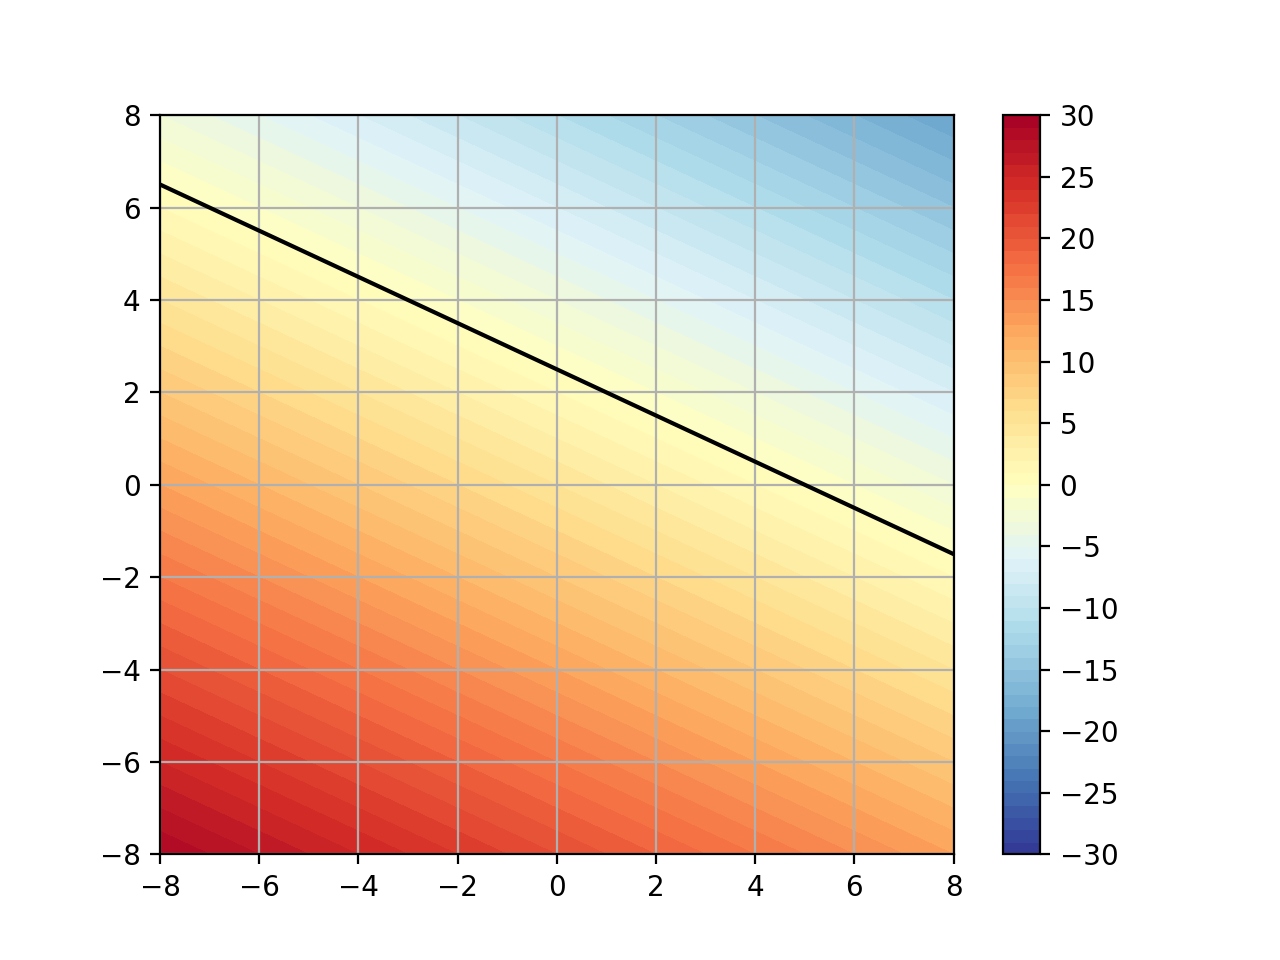

In [10]:
### Linear Plot

# plot the zero line
plt.plot(X1,zero_line, color='black')
# plot the heatmap 
# compute range of activity
max_activity1 = np.max([np.abs(np.min(activity1)),np.max(activity1)])
# round up max activity to nearest log10
base = np.floor(np.log10(max_activity1))
rounded_max = (10**base)*(np.ceil(max_activity1/10**base))

levels = np.arange(-rounded_max, rounded_max+0.1, 10**(base-1))
# ticks = np.arange(-rounded_max, rounded_max+0.1, 5*10**(base-1))
ticks = levels[::5]

plt.contourf(X1s, X2s, np.reshape(activity1, np.shape(X1s) ), levels=levels, cmap=cm.RdYlBu_r)
plt.colorbar(ticks=ticks)
#reset axes
plt.axis([-8,8, -8, 8])
plt.grid(True)
plt.show()

In [11]:
# Properties
# rotate the gradient lines by modifying the ratio -W[0]/[1] 
# Q? how does this translate to higher dimensions?
# increase the range by changing the absolute value of W[i]

<IPython.core.display.Javascript object>


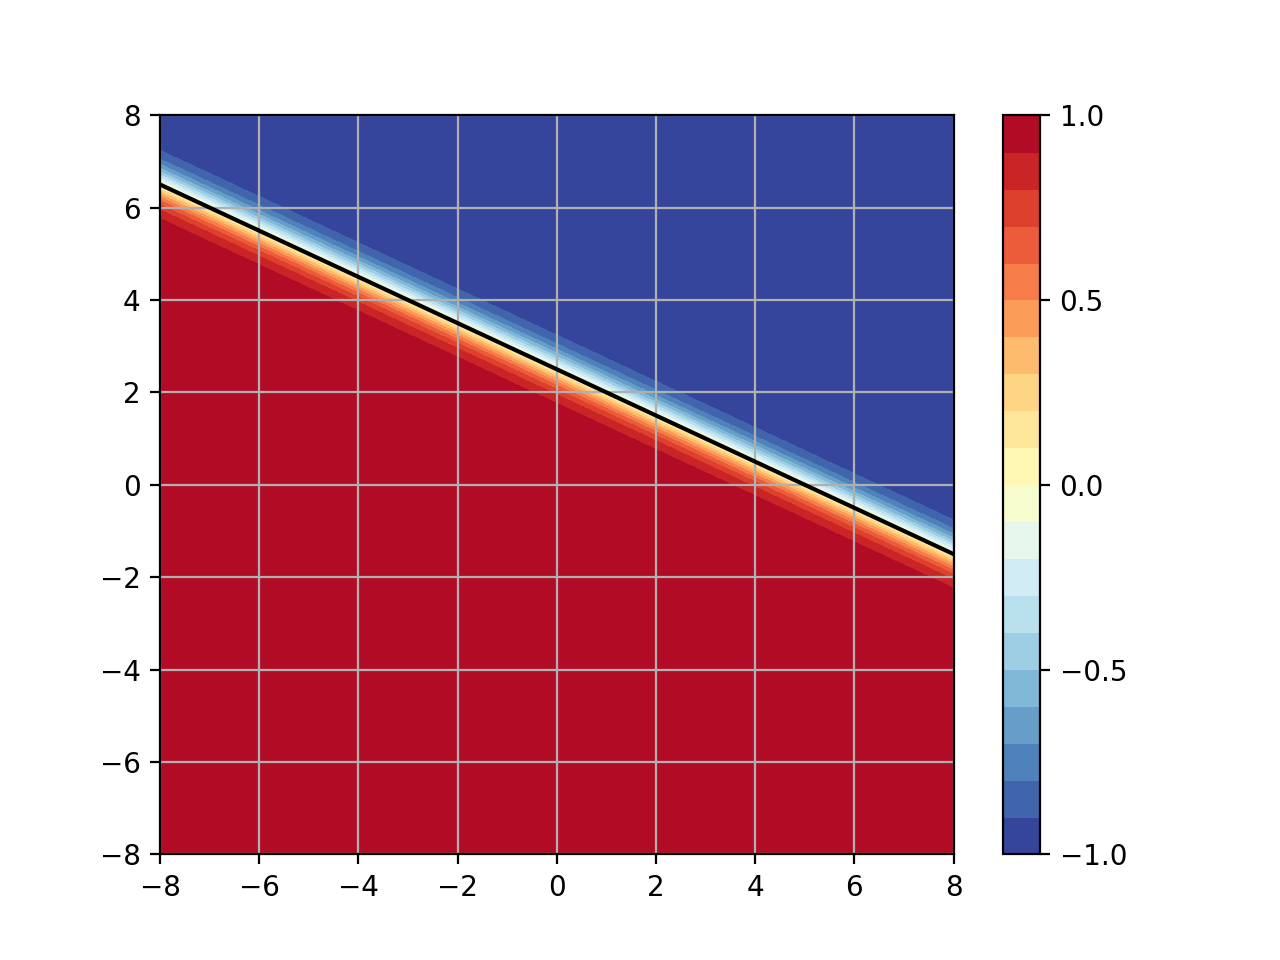

In [12]:
# activity post non-linearity 

activity2 = np.tanh(activity1)

# plot the zero line
plt.plot(X1,zero_line, color='black')
# plot the heatmap 
levels = np.arange(-1,1.1, 0.1)
# extend level to be inclusive on last level
levels[-1]*=1.001
ticks = np.arange(-1,1.1,0.2)
ticks = levels[::5]

plt.contourf(X1s, X2s, np.reshape(activity2, np.shape(X1s) ), levels=levels, cmap=cm.RdYlBu_r)
plt.colorbar(ticks=ticks)
#reset axes
plt.axis([-8,8, -8, 8])
plt.grid(True)
plt.show()

In [13]:
###  2 - gaussian heatmap

# combining circular gaussian with normal neuron
# neuron parameters (weights, bias)
W = [-1, -2]
# b = 0 # bias defined by by the center of radial function

# radial parameters
center = [1, 2] # controls the center of gaussian (<=> bias of neuron)
sig = 5# controls the size of the gaussian

# the centers define the linear bias
b = -np.matmul(W,center)
print(b)

5


In [14]:
# heatmap neuronal activity
n_activity = np.sum(W*inputs_heatmap, axis=1)+b
print(n_activity.shape)

# heatmap radial activity 
r_activity = np.exp((-(1.0/sig)**2) *  np.sum(np.square(inputs_heatmap-center), axis=1))
print(r_activity.shape)

# overall heatmap activity
activity3 = n_activity*r_activity

(25921,)
(25921,)


<IPython.core.display.Javascript object>


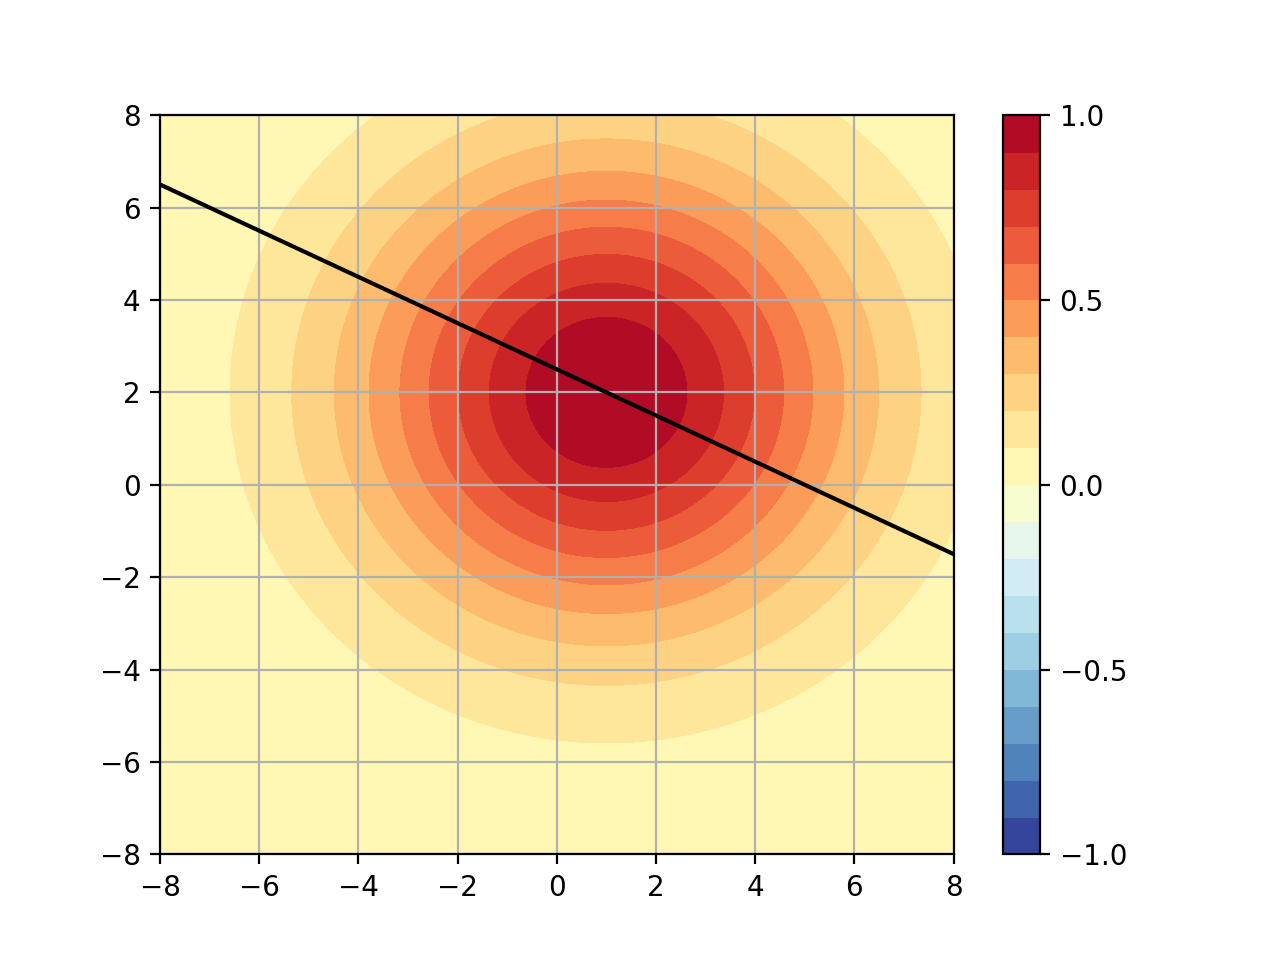

In [15]:
# plot the gaussian activity alone
# plot the zero line
plt.plot(X1,zero_line, color='black')

levels = np.arange(-1.0, 1.0+0.1, 0.1)
ticks = levels[::5]

plt.contourf(X1s, X2s, np.reshape(r_activity, np.shape(X1s) ), levels=levels, cmap=cm.RdYlBu_r)

plt.colorbar(ticks=ticks)

#reset axes
plt.axis([-8,8, -8, 8])
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


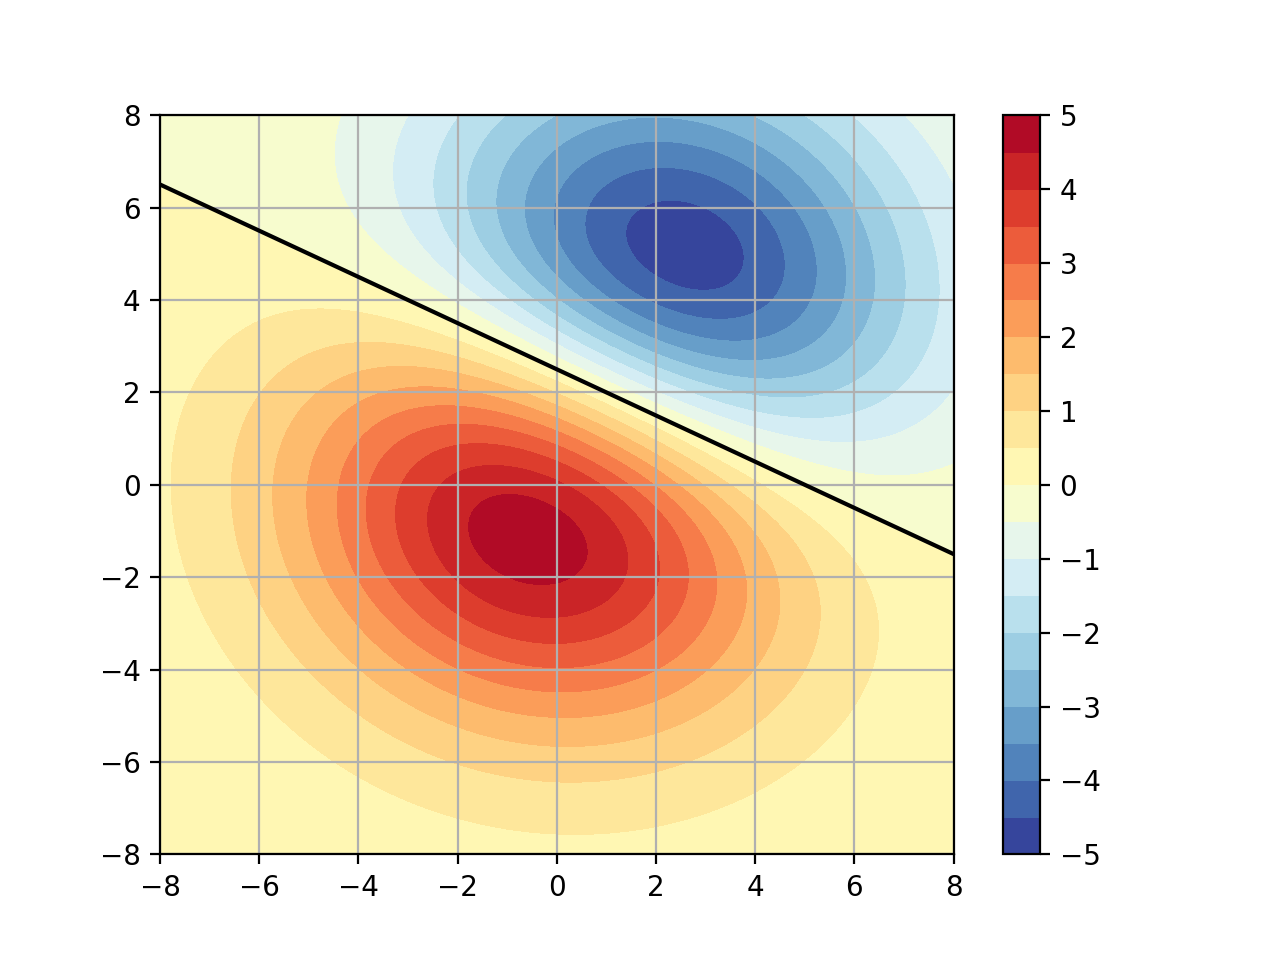

In [16]:
# plot the heatmap 

# plot the zero line
plt.plot(X1,zero_line, color='black')

levels = np.arange(-sig,sig+0.1,sig/10.0)
ticks = np.arange(-sig,sig+1, sig/5.0)

# plt.contourf(X1s, X2s, np.reshape(activity3, np.shape(X1s) ), np.arange(-1.0, 1.01, 1/100.0), cmap=cm.RdYlBu_r, vmin=0, vmax=peak_max)
plt.contourf(X1s, X2s, np.reshape(activity3, np.shape(X1s) ), levels=levels, cmap=cm.RdYlBu_r)
# plt.contourf(X1s, X2s, np.reshape(activity3, np.shape(X1s) ), cmap=cm.RdYlBu_r)

plt.colorbar(ticks=ticks)

#reset axes
plt.axis([-8,8, -8, 8])
plt.grid(True)
plt.show()

In [17]:
# whats the max?
print(np.max(activity3))

4.794366302764305


<IPython.core.display.Javascript object>


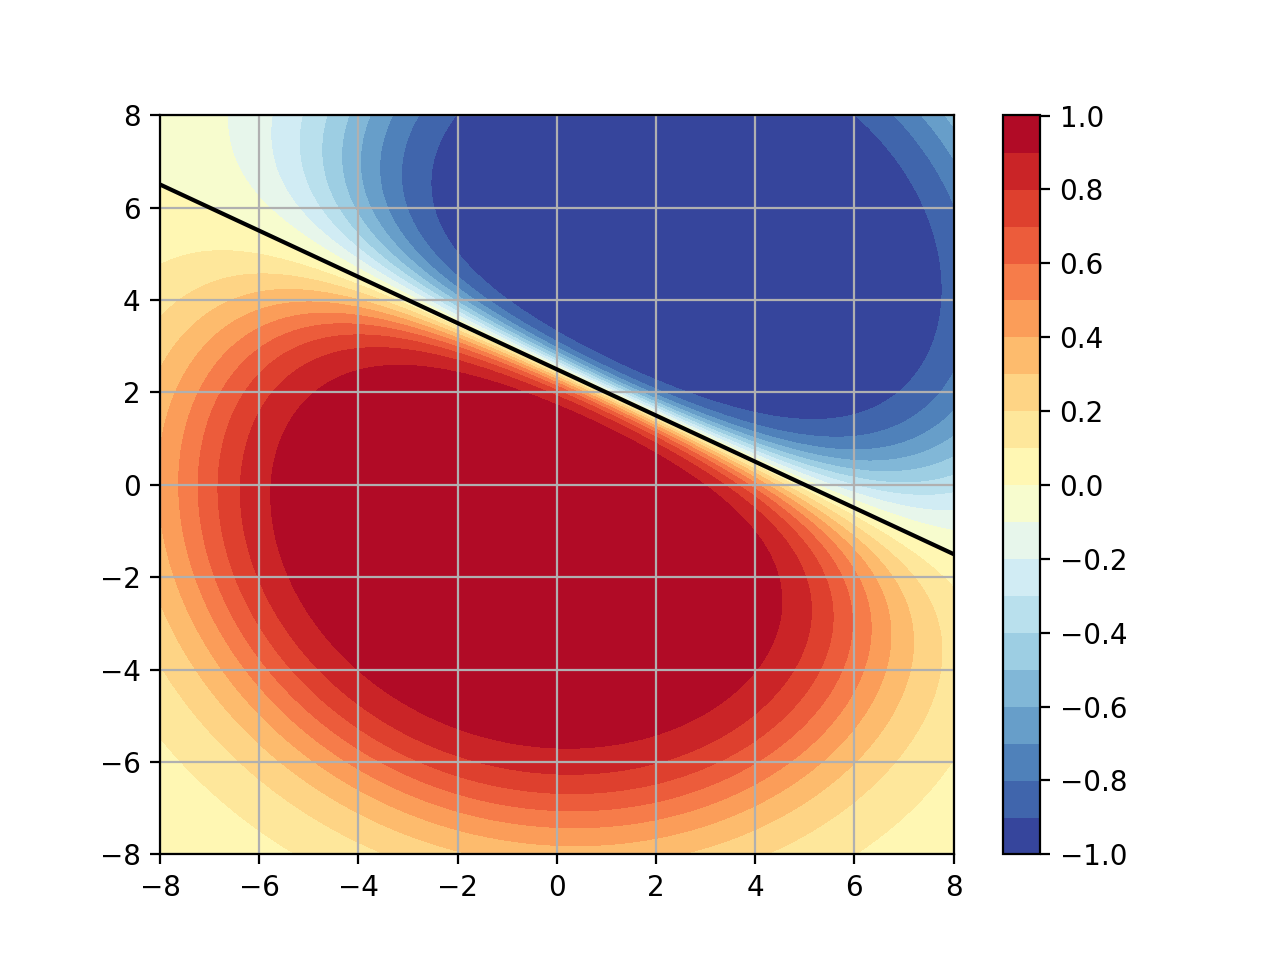

In [18]:
# Test: add tanh non-linearity to above activity 

activity4 = np.tanh(activity3)

# plot the zero line
plt.plot(X1,zero_line, color='black')
# plot the heatmap 
levels = np.arange(-1,1.1, 0.1)
# extend level to be inclusive on last level
levels[-1]*=1.001
ticks = np.arange(-1,1.1,0.2)

plt.contourf(X1s, X2s, np.reshape(activity4, np.shape(X1s) ), levels=levels, cmap=cm.RdYlBu_r)
plt.colorbar(ticks=ticks)
#reset axes
plt.axis([-8,8, -8, 8])
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


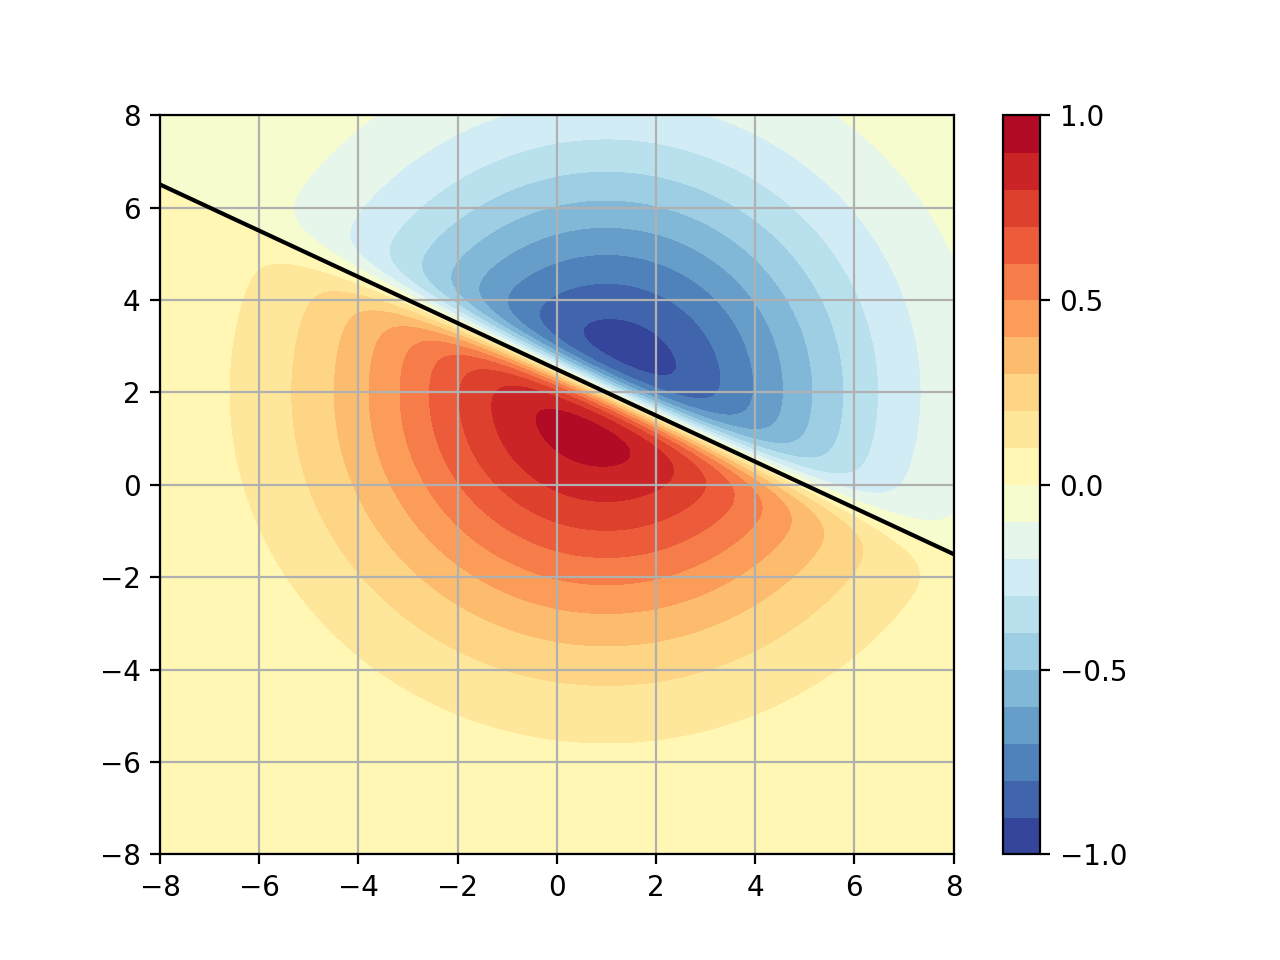

In [19]:
# TEST: activity of tanh(lin)*gaussian

activity5 = np.tanh(n_activity)*r_activity

# plot the zero line
plt.plot(X1,zero_line, color='black')
# plot the heatmap 
levels = np.arange(-1,1.1, 0.1)
# extend level to be inclusive on last level
levels[-1]*=1.001
ticks = levels[::5]


plt.contourf(X1s, X2s, np.reshape(activity5, np.shape(X1s) ), levels=levels, cmap=cm.RdYlBu_r)

plt.colorbar(ticks=ticks)
#reset axes
plt.axis([-8,8, -8, 8])
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


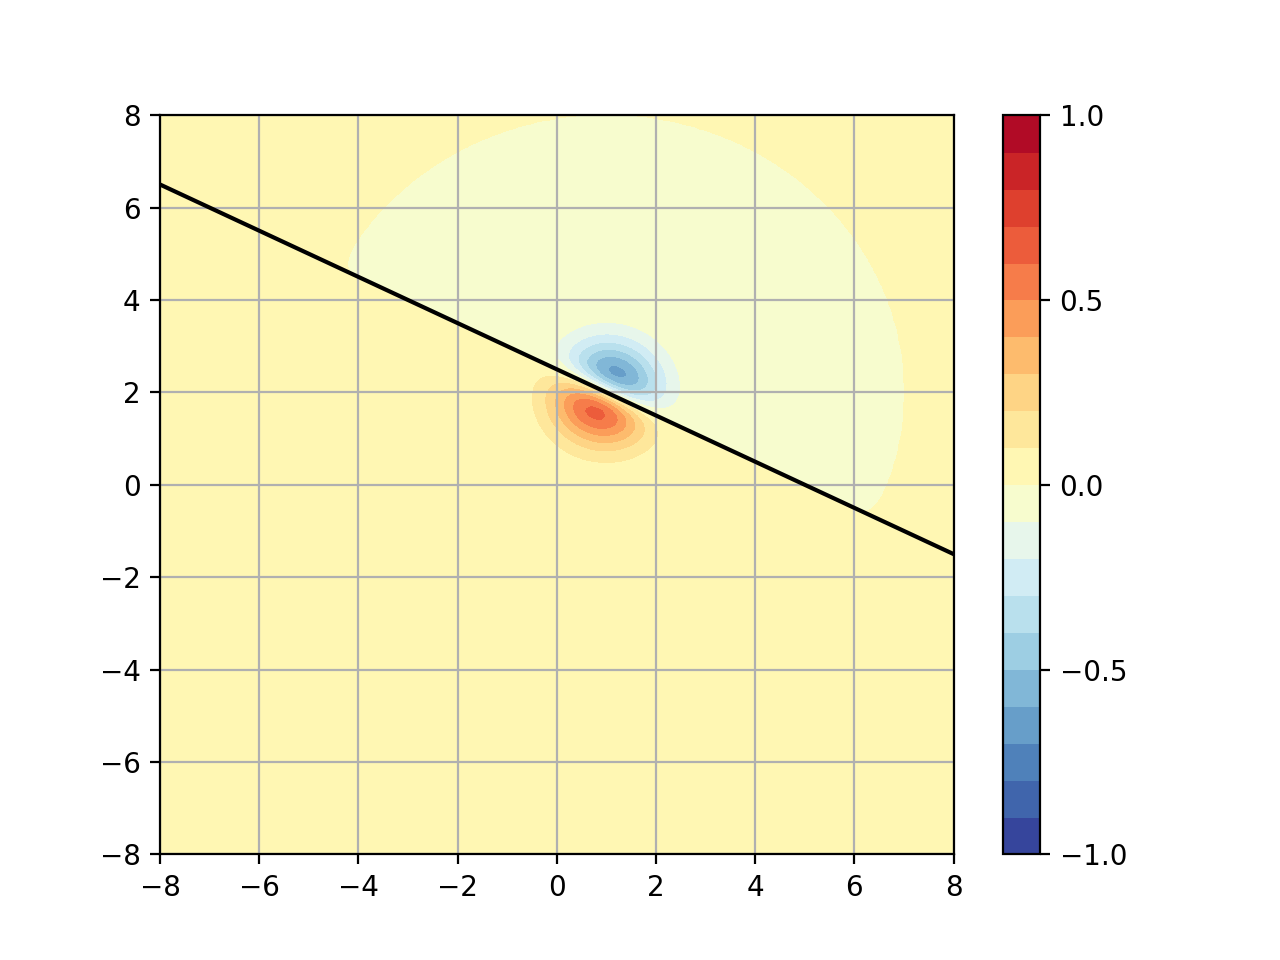

<IPython.core.display.Javascript object>


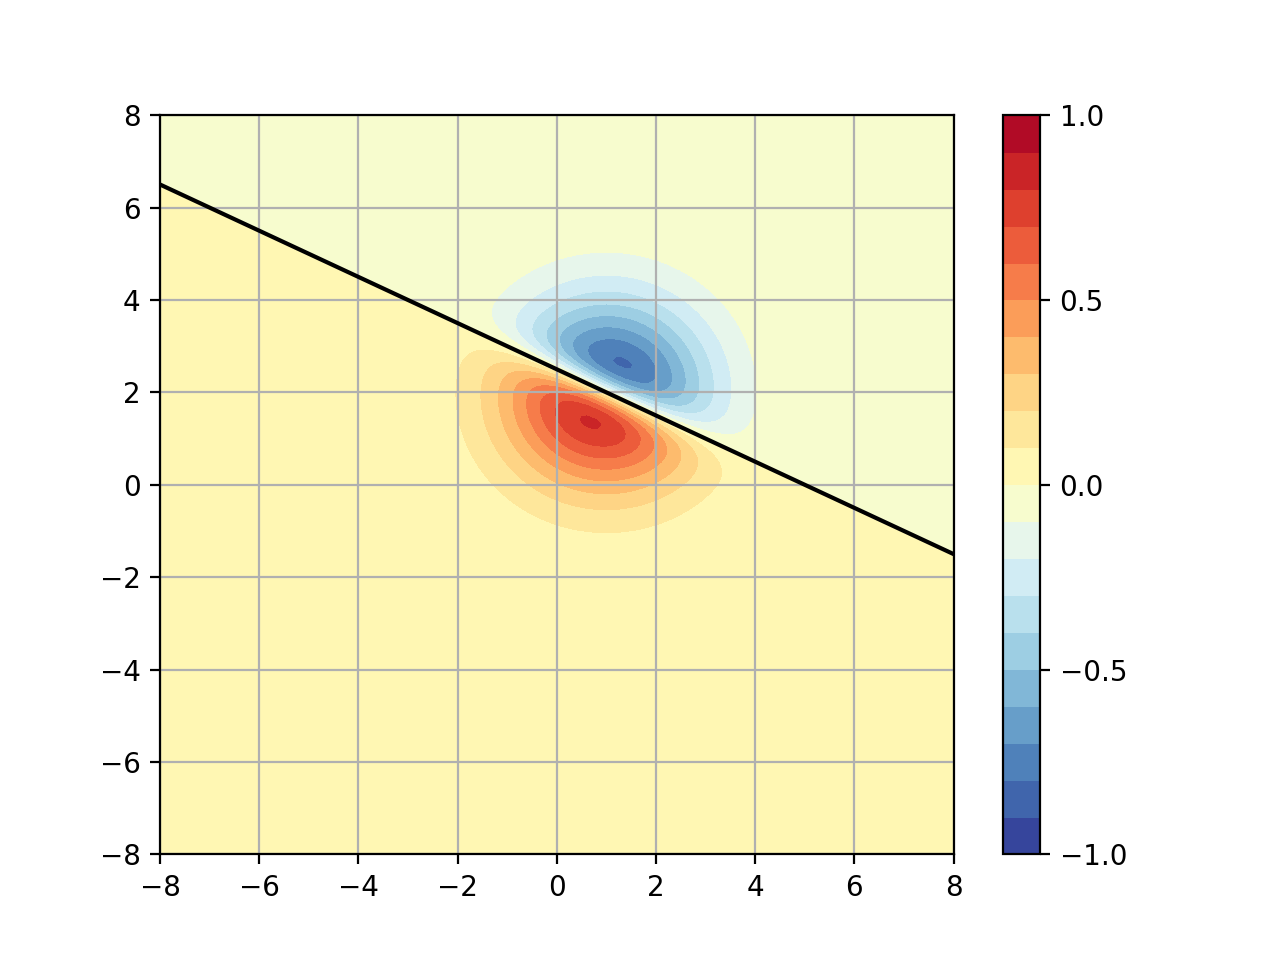

<IPython.core.display.Javascript object>


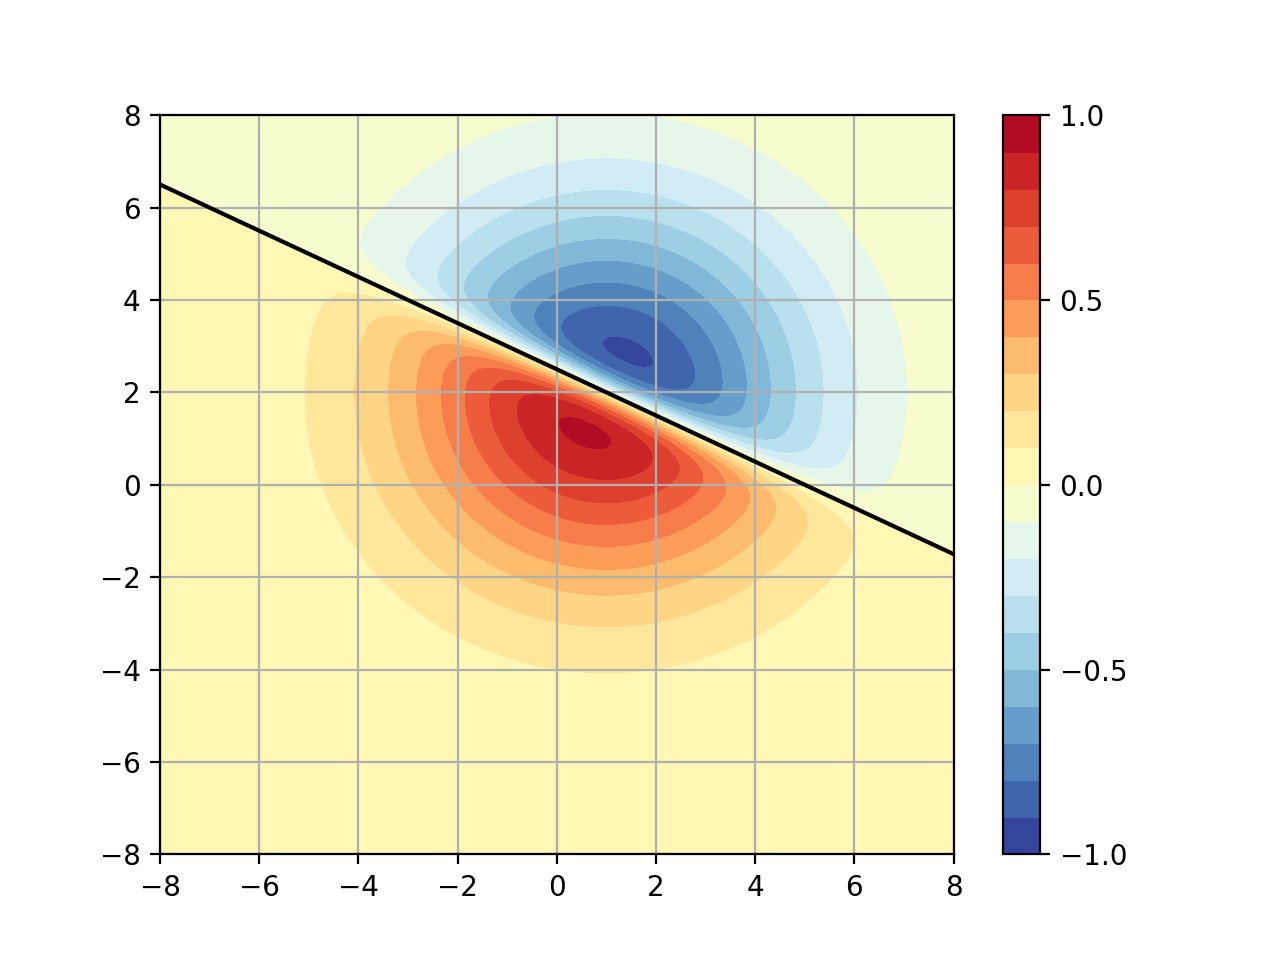

<IPython.core.display.Javascript object>


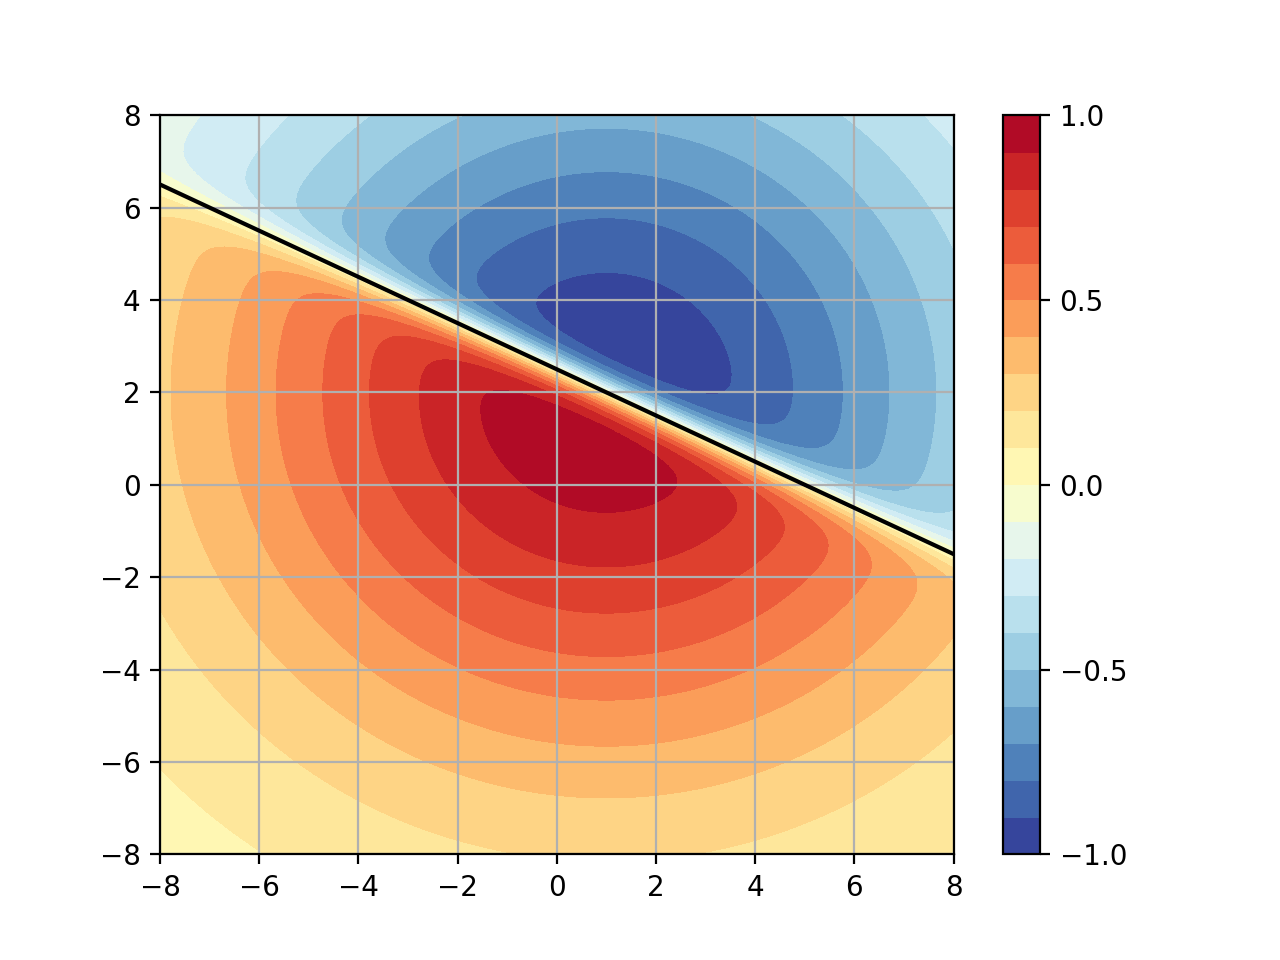

<IPython.core.display.Javascript object>


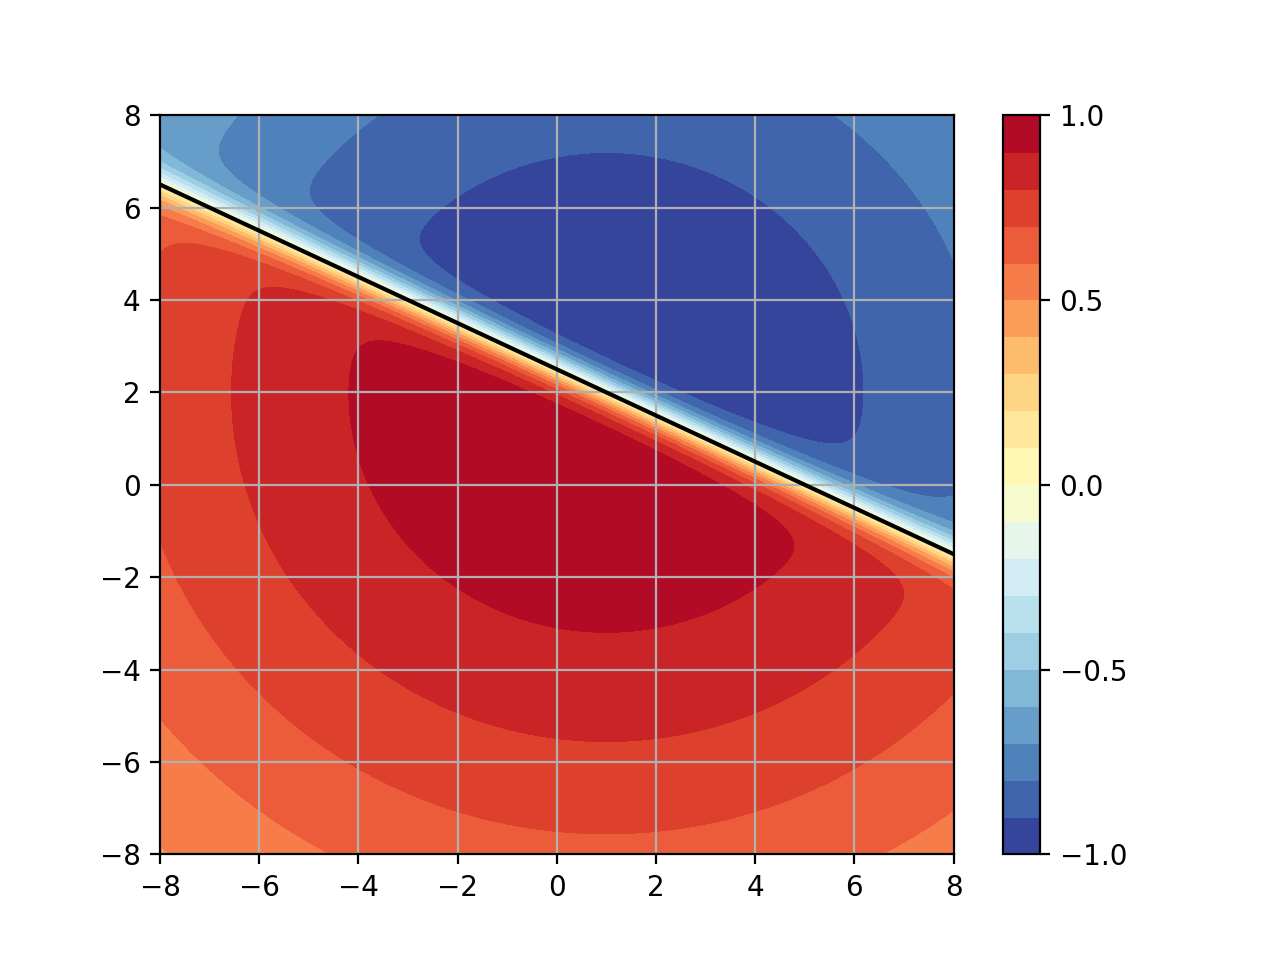

<IPython.core.display.Javascript object>


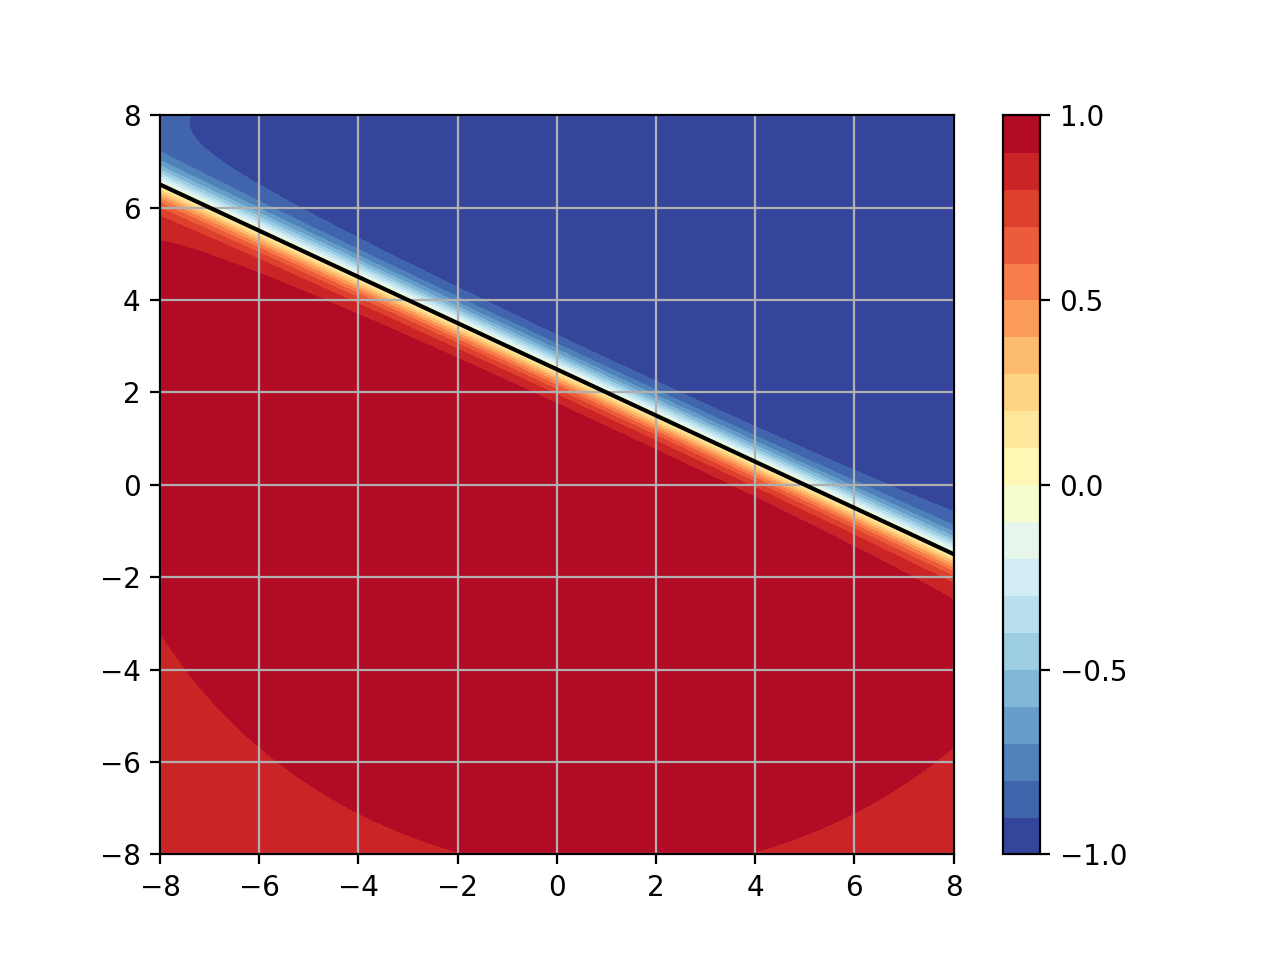

<IPython.core.display.Javascript object>


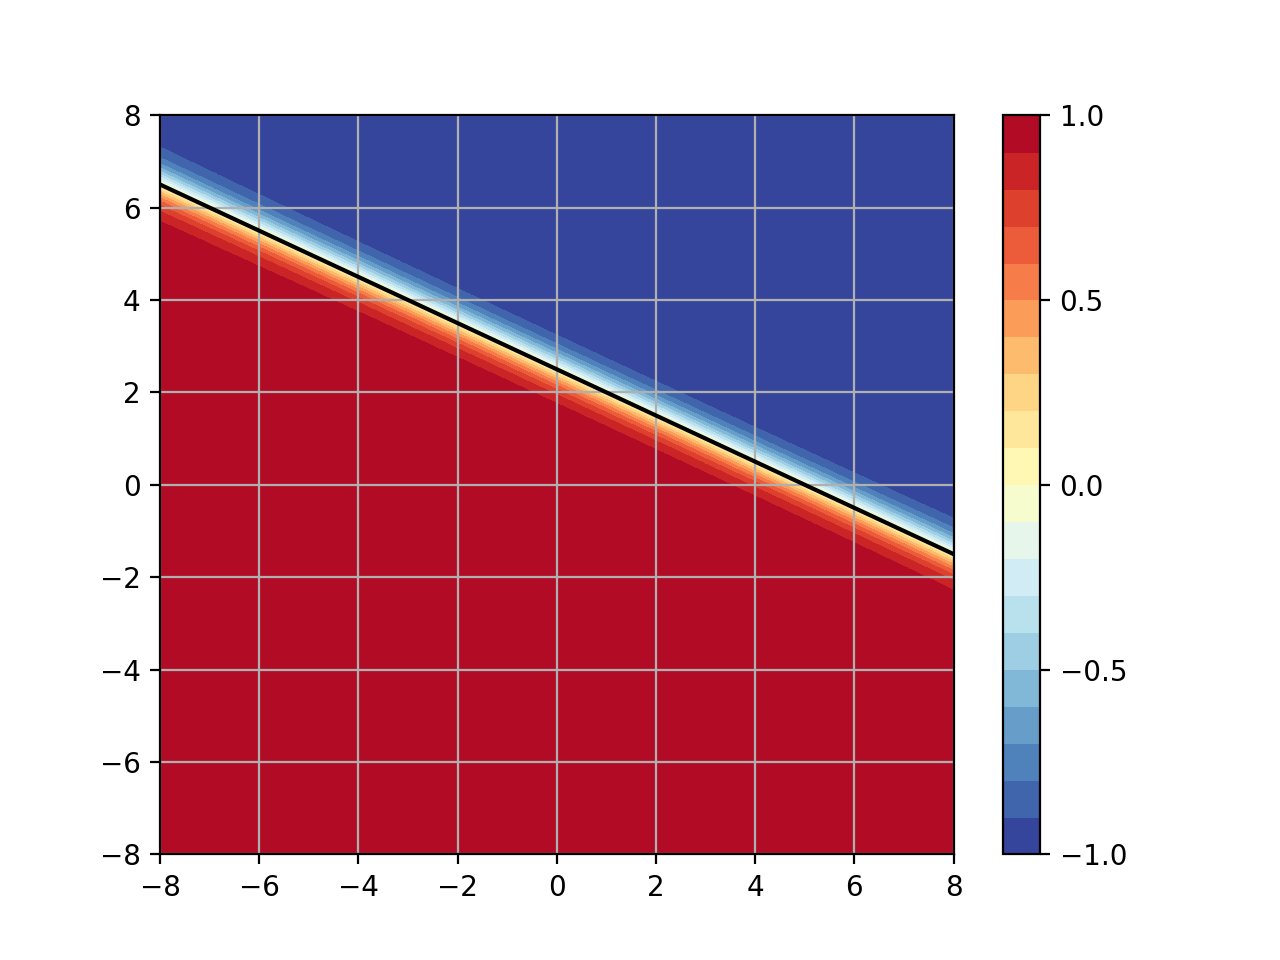

<IPython.core.display.Javascript object>


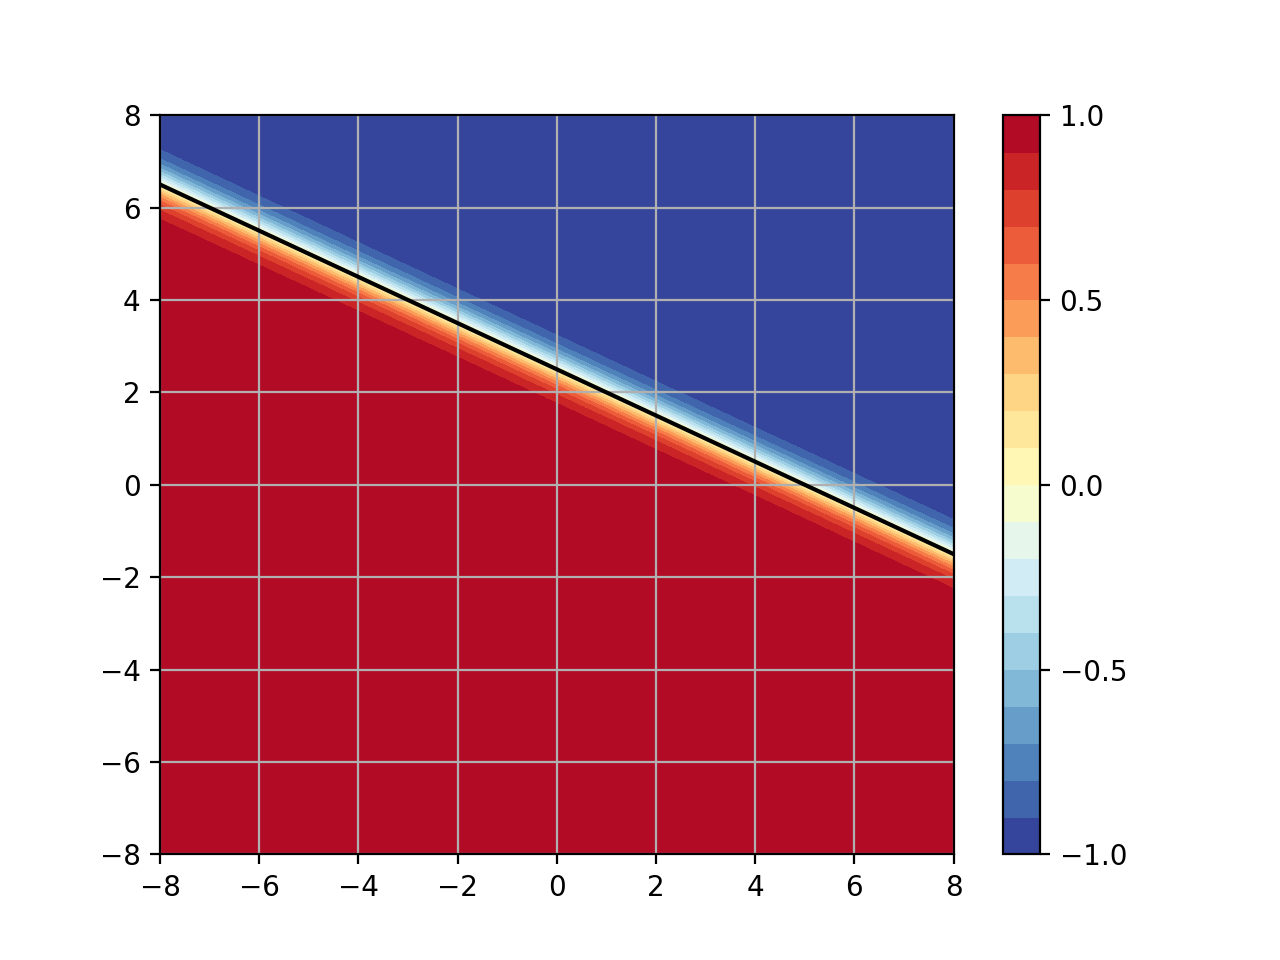

<IPython.core.display.Javascript object>


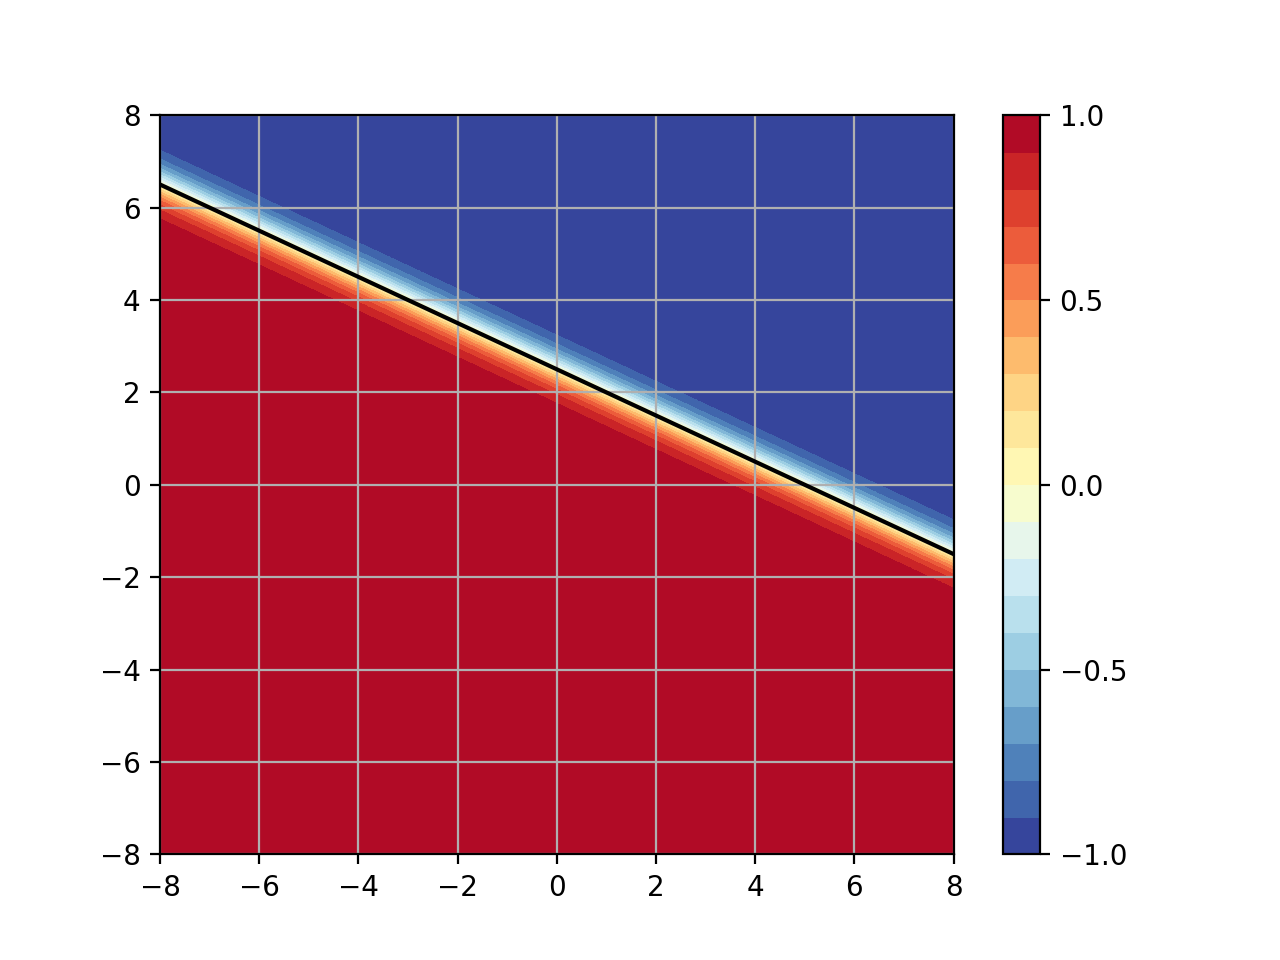

<IPython.core.display.Javascript object>


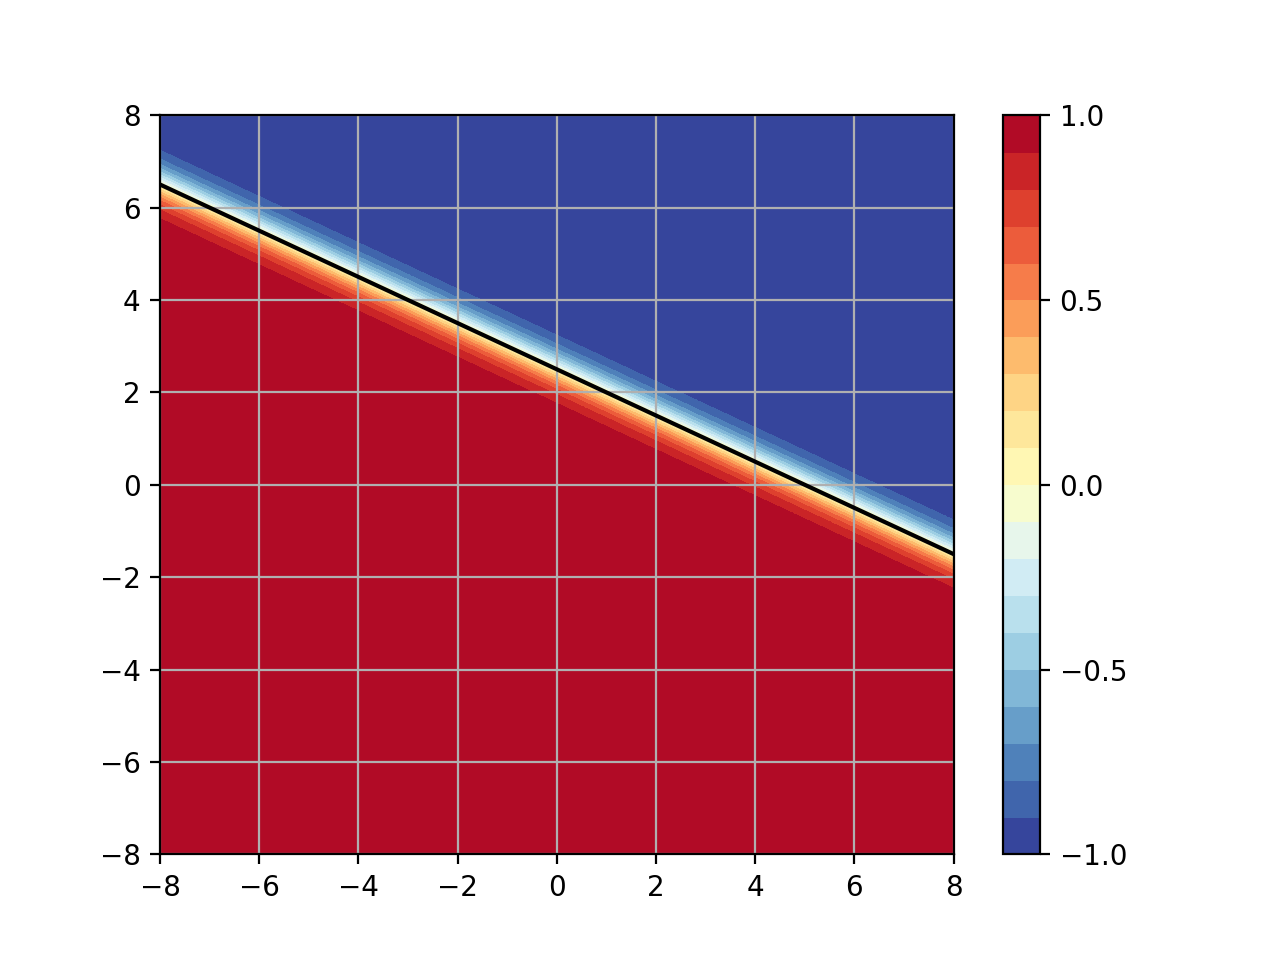

In [20]:
# Note: if sigma is large, the behavior of the FGN approaches that of the linear neuron

levels = np.arange(-1,1.1, 0.1)
# extend level to be inclusive on last level
levels[-1]*=1.001
ticks = levels[::5]


for sig2 in [2**n for n in range(10)]:

    # heatmap radial activity 
    r_activity_s = np.exp((-1.0/sig2**2) *  np.sum(np.square(inputs_heatmap-center), axis=1))
    
    # overall heatmap activity
    activity_s = np.tanh(n_activity)*r_activity_s
    
    # plot the heatmap 

    # plot the zero line
    plt.plot(X1,zero_line, color='black')
    plt.contourf(X1s, X2s, np.reshape(activity_s, np.shape(X1s) ), levels=levels, cmap=cm.RdYlBu_r)
    
    plt.colorbar(ticks=ticks)

    #reset axes
    plt.axis([-8,8, -8, 8])
    plt.grid(True)
    plt.show()

0.9999999999916536


<IPython.core.display.Javascript object>


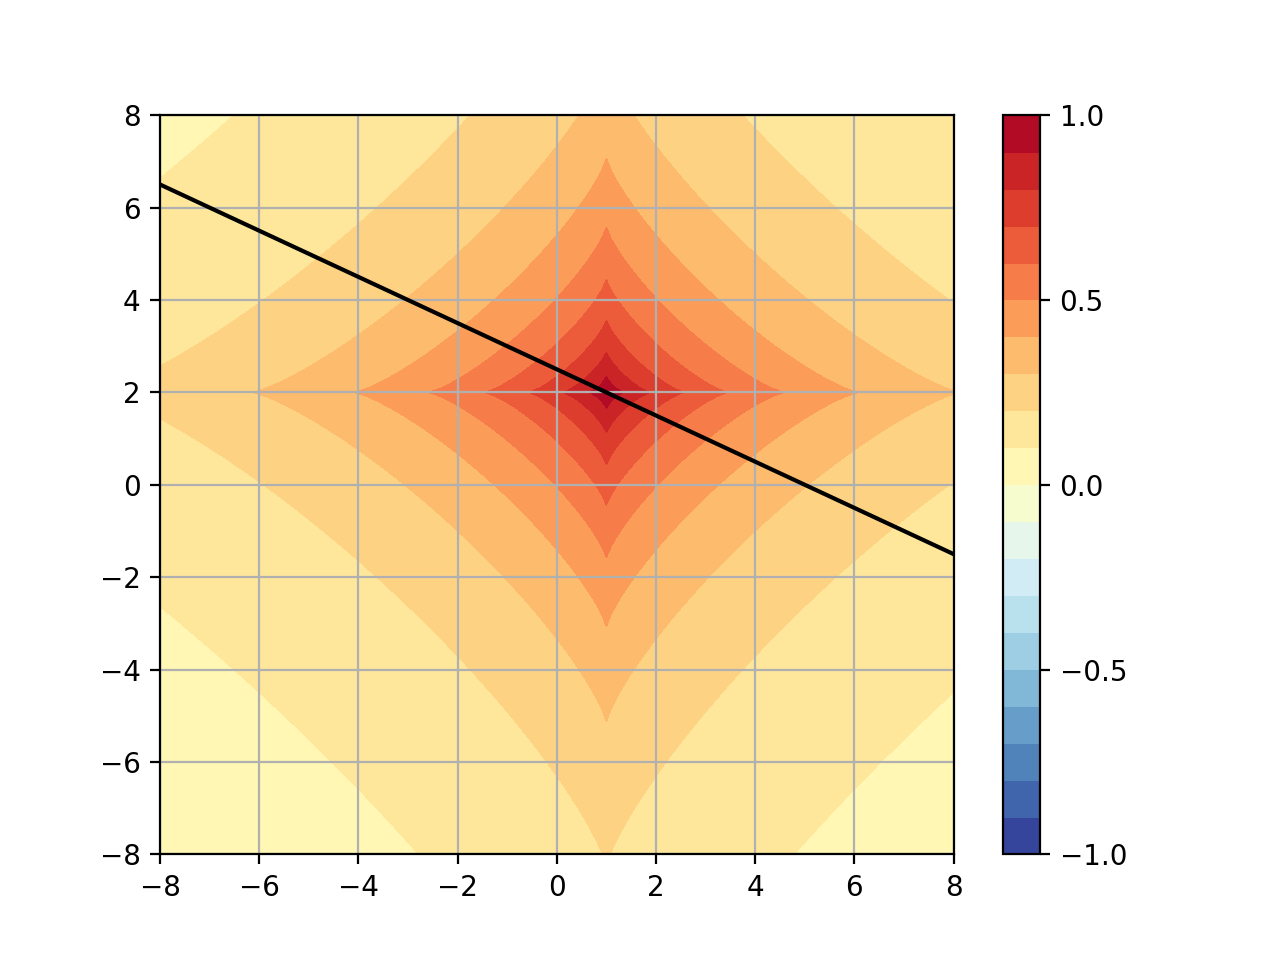

In [21]:
# norm based activity for stranger looking gaussian
# Note: if ord=2, same shape as above
# if ord=1, diamond shape
# as ord goes to float('inf'), approaches a square (Manhattan dist)
# as ord go to 0, concave diamond shape
# as ord lower, the region of high activity is higher?

ord=float(0.8)
sig = 2.0
# r_activity2 = np.exp((-1.0/sig**2) * np.linalg.norm(inputs_heatmap-center, ord=ord, axis=1) )
# manual computation (probably not as optimized as numpy but doesn't have to involve **(1.0/ord))
r_activity2 = np.exp((-1.0/sig**2) * np.sum(np.abs(inputs_heatmap-center)**ord, axis=1))

# max of radial activity (should be close to 1)
print(np.max(r_activity2))

# plot the gaussian activity alone
# plot the zero line
plt.plot(X1,zero_line, color='black')

levels = np.arange(-1, 1.0+0.1, 0.1)
ticks = levels[::5]

plt.contourf(X1s, X2s, np.reshape(r_activity2, np.shape(X1s) ), levels=levels, cmap=cm.RdYlBu_r)
# plt.contourf(X1s, X2s, np.reshape(r_activity2, np.shape(X1s) ), cmap=cm.RdYlBu_r)

plt.colorbar(ticks=ticks)
# plt.colorbar()

#reset axes
plt.axis([-8,8, -8, 8])
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


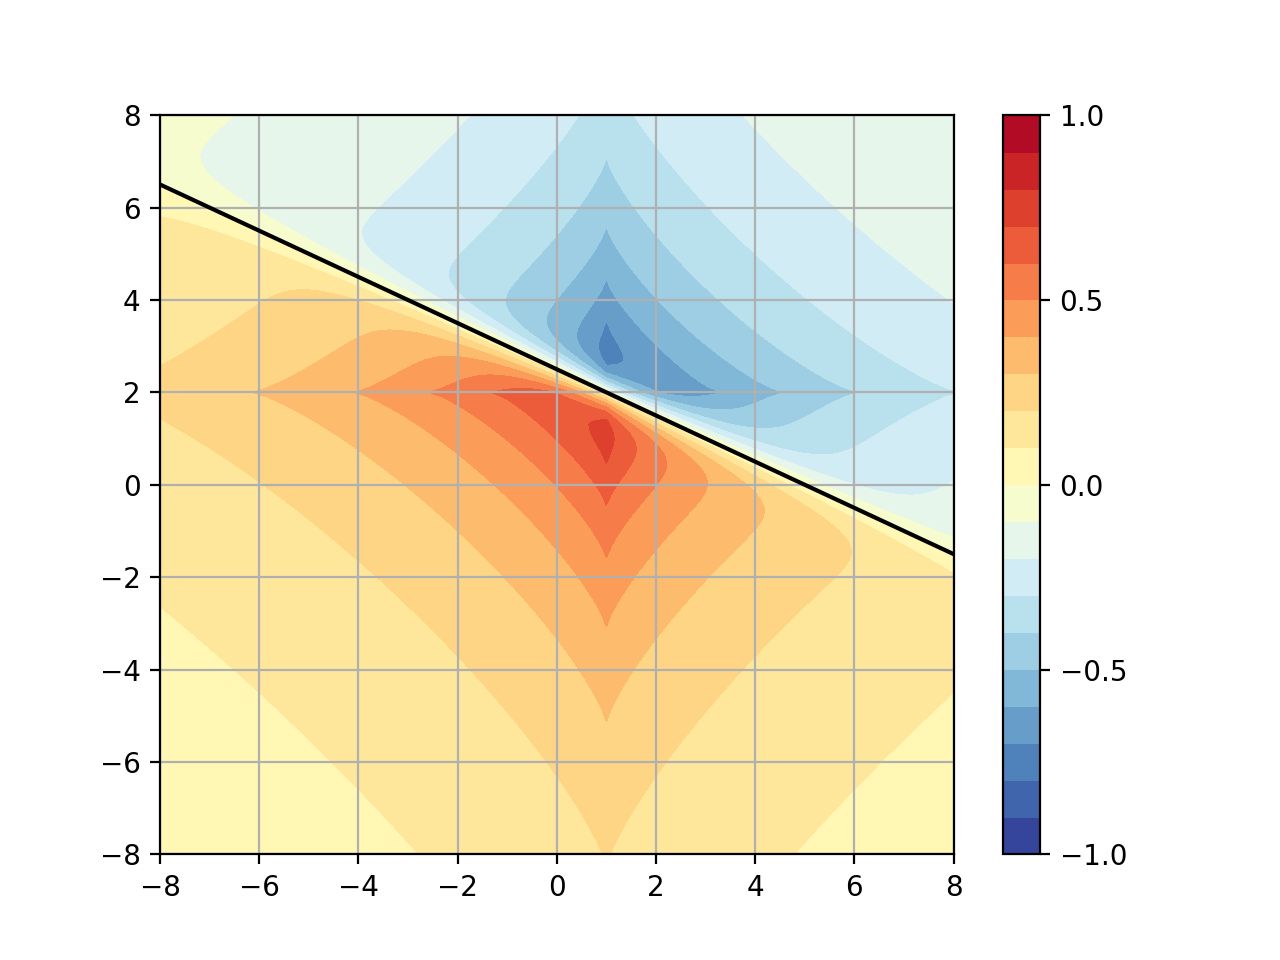

In [22]:
activity6 = np.tanh(n_activity)*r_activity2

# plot the zero line
plt.plot(X1,zero_line, color='black')
# plot the heatmap 
levels = np.arange(-1,1.1, 0.1)
# extend level to be inclusive on last level
levels[-1]*=1.001
ticks = levels[::5]


plt.contourf(X1s, X2s, np.reshape(activity6, np.shape(X1s) ), levels=levels, cmap=cm.RdYlBu_r)

plt.colorbar(ticks=ticks)
#reset axes
plt.axis([-8,8, -8, 8])
plt.grid(True)
plt.show()

In [23]:
### Part 2 - diagonal covariance matrix

In [24]:
# diagonal covariance matrix, represented as a vector
cov = np.array([50,1])
print(cov)

# inverse 
inv_cov = 1.0/cov
print(inv_cov)

[50  1]
[0.02 1.  ]


In [25]:
# heatmap radial activity 
d = inputs_heatmap-center
# print(d.shape)
# de = np.matmul(d,np.linalg.inv(sig_mat))
# print(de.shape)
# ded = np.einsum('ij,ij->i', de, d)
# print(ded.shape)
ded = np.einsum('ij,ij->i', d/cov, d)
r_activity_diag = np.exp(-ded)
print(r_activity.shape)

(25921,)


<IPython.core.display.Javascript object>


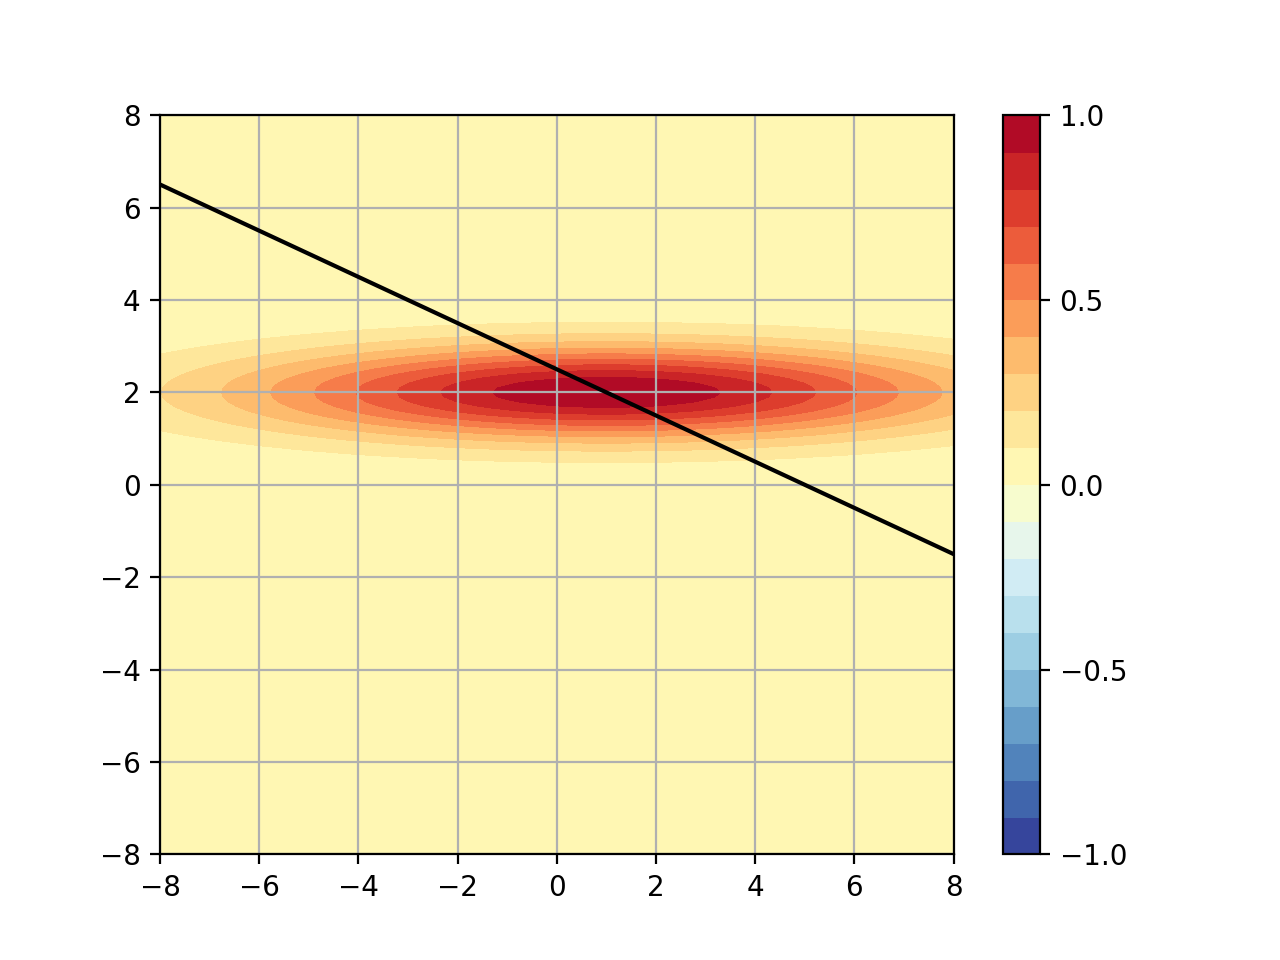

In [26]:
# plot the gaussian activity alone
# plot the zero line
plt.plot(X1,zero_line, color='black')

levels = np.arange(-1.0, 1.0+0.1, 0.1)
ticks = levels[::5]

plt.contourf(X1s, X2s, np.reshape(r_activity_diag, np.shape(X1s) ), levels=levels, cmap=cm.RdYlBu_r)

plt.colorbar(ticks=ticks)

#reset axes
plt.axis([-8,8, -8, 8])
plt.grid(True)
plt.show()

In [27]:
# overall heatmap activity
activity_diag = n_activity*r_activity_diag
max_act = np.max(abs(activity_diag))

print(max_act)

3.151437271959225


<IPython.core.display.Javascript object>


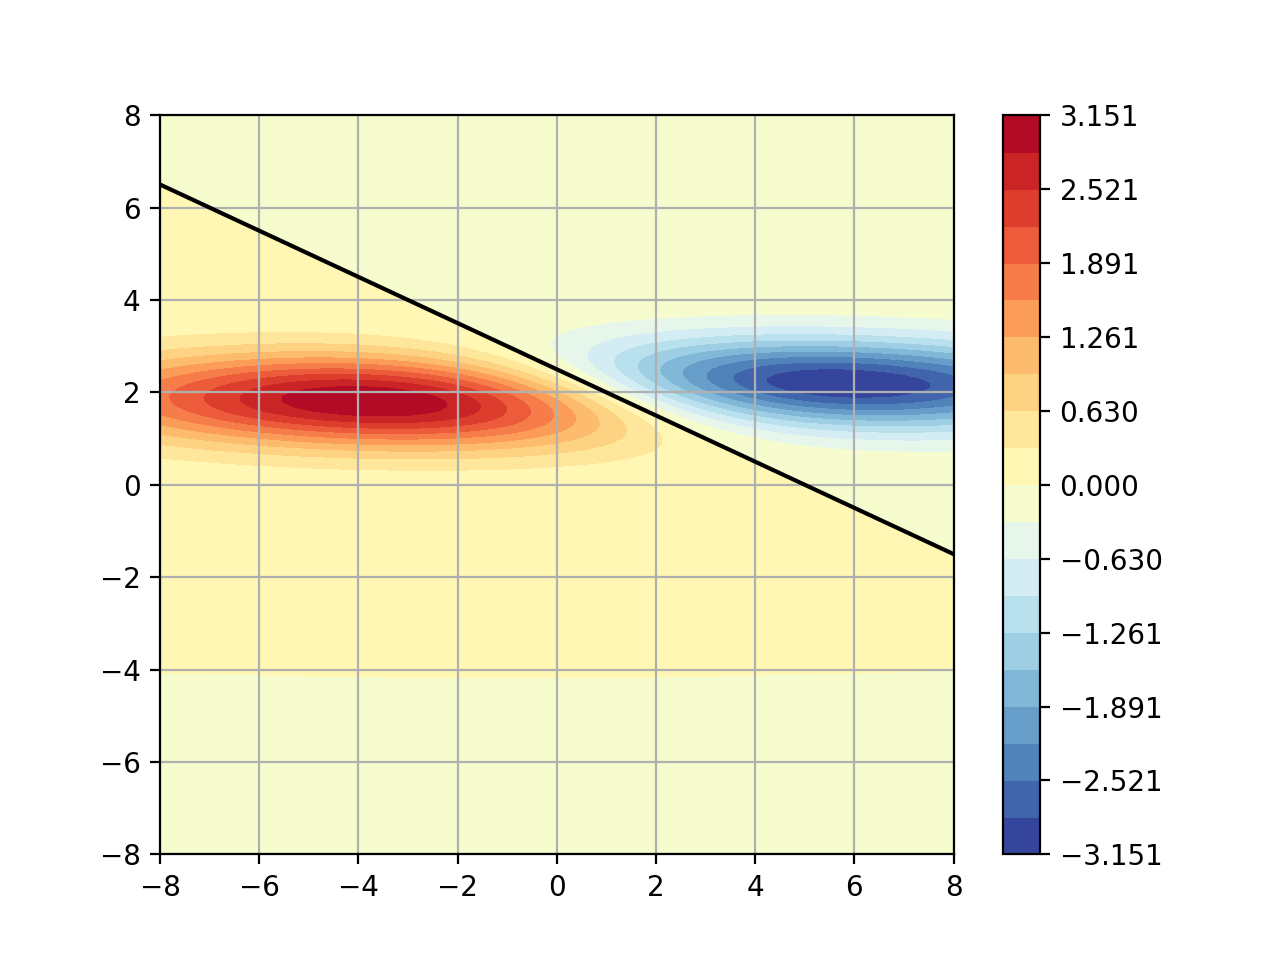

In [28]:
# plot the heatmap 

# plot the zero line
plt.plot(X1,zero_line, color='black')

levels = np.arange(-max_act,max_act+0.1, max_act/10.0)
ticks = np.arange(-max_act,max_act+1, max_act/5.0)

plt.contourf(X1s, X2s, np.reshape(activity_diag, np.shape(X1s) ), levels=levels, cmap=cm.RdYlBu_r)

plt.colorbar(ticks=ticks)

#reset axes
plt.axis([-8,8, -8, 8])
plt.grid(True)
plt.show()

In [29]:
### Part 3 - full covariance matrix

In [30]:
# covariance matrix
sig_mat = np.array([[1,2],[3,4]])
# make positive definite
sig_mat = 0.5*(sig_mat+sig_mat.T)+2.0*np.eye(2)
# sig_mat = np.array([sig_mat, 10.0*sig_mat]) # to test multiple neurons
print(sig_mat.shape)
print(sig_mat)

(2, 2)
[[3.  2.5]
 [2.5 6. ]]


In [31]:
# heatmap radial activity 
d = inputs_heatmap-center
print(d.shape)
de = np.matmul(d,np.linalg.inv(sig_mat))
print(de.shape)
# obfuscated but quick way of taking he diag of ded
ded = np.einsum('ij,ij->i', de, d)
# # to test multiple neurons
# ded = np.einsum('ijk,jk->ij', de, d)

print(ded.shape)
r_activity_full = np.exp(-ded)
print(r_activity_full.shape)

(25921, 2)
(25921, 2)
(25921,)
(25921,)


/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


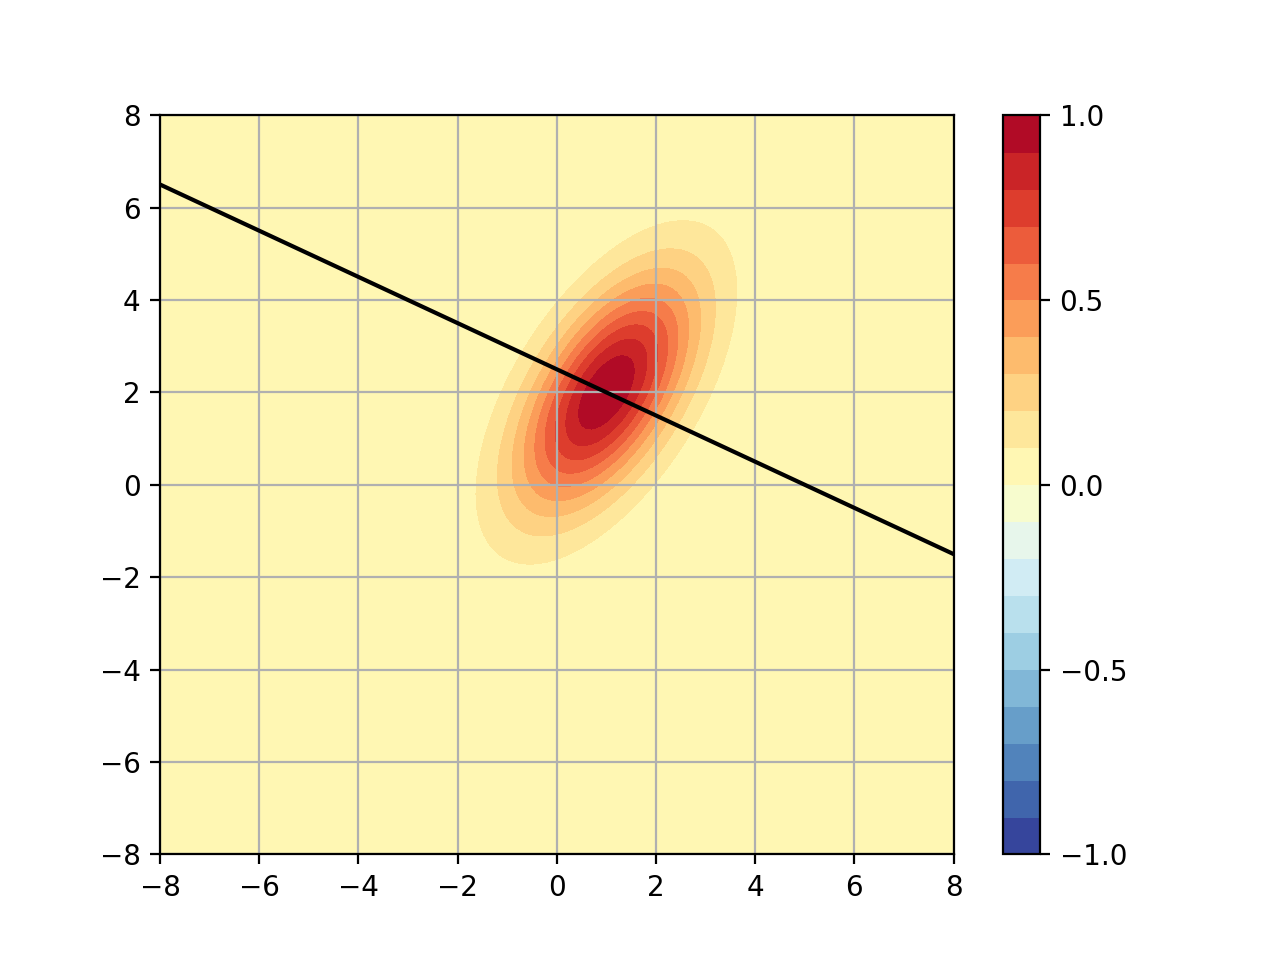

In [32]:
# plot the gaussian activity alone
# plot the zero line
plt.plot(X1,zero_line, color='black')

levels = np.arange(-1.0, 1.0+0.1, 0.1)
ticks = levels[::5]

plt.contourf(X1s, X2s, np.reshape(r_activity_full, np.shape(X1s) ), levels=levels, cmap=cm.RdYlBu_r)

plt.colorbar(ticks=ticks)

#reset axes
plt.axis([-8,8, -8, 8])
plt.grid(True)
plt.show()

In [33]:
# overall heatmap activity
activity_full = n_activity*r_activity_full
max_act = np.max(abs(activity_full))

print(max_act)

2.6069722508049895


<IPython.core.display.Javascript object>


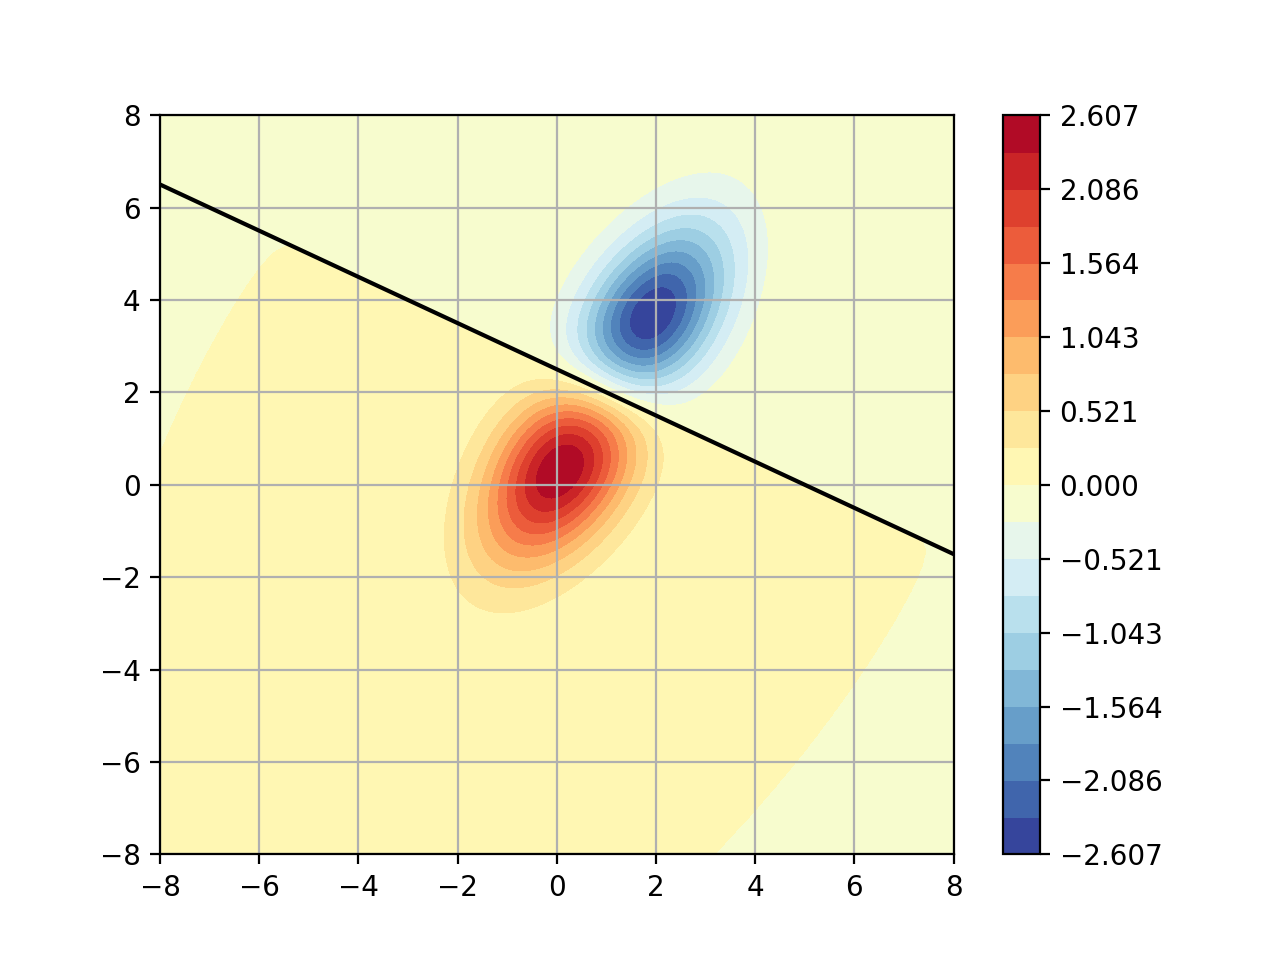

In [34]:
# plot the heatmap 

# plot the zero line
plt.plot(X1,zero_line, color='black')

levels = np.arange(-max_act,max_act+0.1, max_act/10.0)
ticks = np.arange(-max_act,max_act+1, max_act/5.0)

plt.contourf(X1s, X2s, np.reshape(activity_full, np.shape(X1s) ), levels=levels, cmap=cm.RdYlBu_r)

plt.colorbar(ticks=ticks)

#reset axes
plt.axis([-8,8, -8, 8])
plt.grid(True)
plt.show()

In [35]:
### Extra 1 - dev of einsum math for batch_size * num_neurons * input dim
# with multiple centers and neurons

In [36]:
batch_size = inputs_heatmap.shape[0]
num_neurons = 3
input_dim = inputs_heatmap.shape[1]
print(batch_size, num_neurons, input_dim)

25921 3 2


In [37]:
centers = np.array([5.0*np.random.rand(input_dim) for x in range(num_neurons)])
print(centers.shape)
print(centers)

(3, 2)
[[2.14084298 1.12304518]
 [4.98593065 0.18775654]
 [4.45667108 3.01644333]]


In [38]:
distances = np.expand_dims(a=inputs_heatmap,axis=1)-centers
print(distances.shape)

(25921, 3, 2)


In [39]:
### diagonal covar
covar_matrixes = 10.0*np.array([np.random.rand(input_dim) for x in range(num_neurons)])
inv_covar_matrixes = 1.0/covar_matrixes
print(covar_matrixes.shape)
print(covar_matrixes)
print(inv_covar_matrixes.shape)
print(inv_covar_matrixes)

(3, 2)
[[1.1508855  3.72523279]
 [2.17695656 8.81075108]
 [8.92565264 5.0891041 ]]
(3, 2)
[[0.86889617 0.2684396 ]
 [0.45935689 0.1134977 ]
 [0.11203663 0.19649824]]


In [40]:
# check inv
for n in range(len(covar_matrixes)):
    print(covar_matrixes[n])
    print(inv_covar_matrixes[n])
    print(covar_matrixes[n]*inv_covar_matrixes[n])

[1.1508855  3.72523279]
[0.86889617 0.2684396 ]
[1. 1.]
[2.17695656 8.81075108]
[0.45935689 0.1134977 ]
[1. 1.]
[8.92565264 5.0891041 ]
[0.11203663 0.19649824]
[1. 1.]


In [41]:
# seems like no speed up at all
ein_path = np.einsum_path('...ij,...ij->...i', distances/covar_matrixes, distances, optimize='optimal')
for p in ein_path:
    print(p)
    
### this is black magic
# ded = np.einsum('...ij,...ij->...i', distances/covar_matrixes, distances)
ded = np.einsum('zij,zij->zi', distances*inv_covar_matrixes, distances)


r_activity_full = np.exp(-ded)
print("full", r_activity_full.shape)

['einsum_path', (0, 1)]
  Complete contraction:  zij,zij->zi
         Naive scaling:  3
     Optimized scaling:  3
      Naive FLOP count:  3.111e+05
  Optimized FLOP count:  3.111e+05
   Theoretical speedup:  1.000
  Largest intermediate:  7.776e+04 elements
--------------------------------------------------------------------------
scaling                  current                                remaining
--------------------------------------------------------------------------
   3                 zij,zij->zi                                   zi->zi
full (25921, 3)


<IPython.core.display.Javascript object>


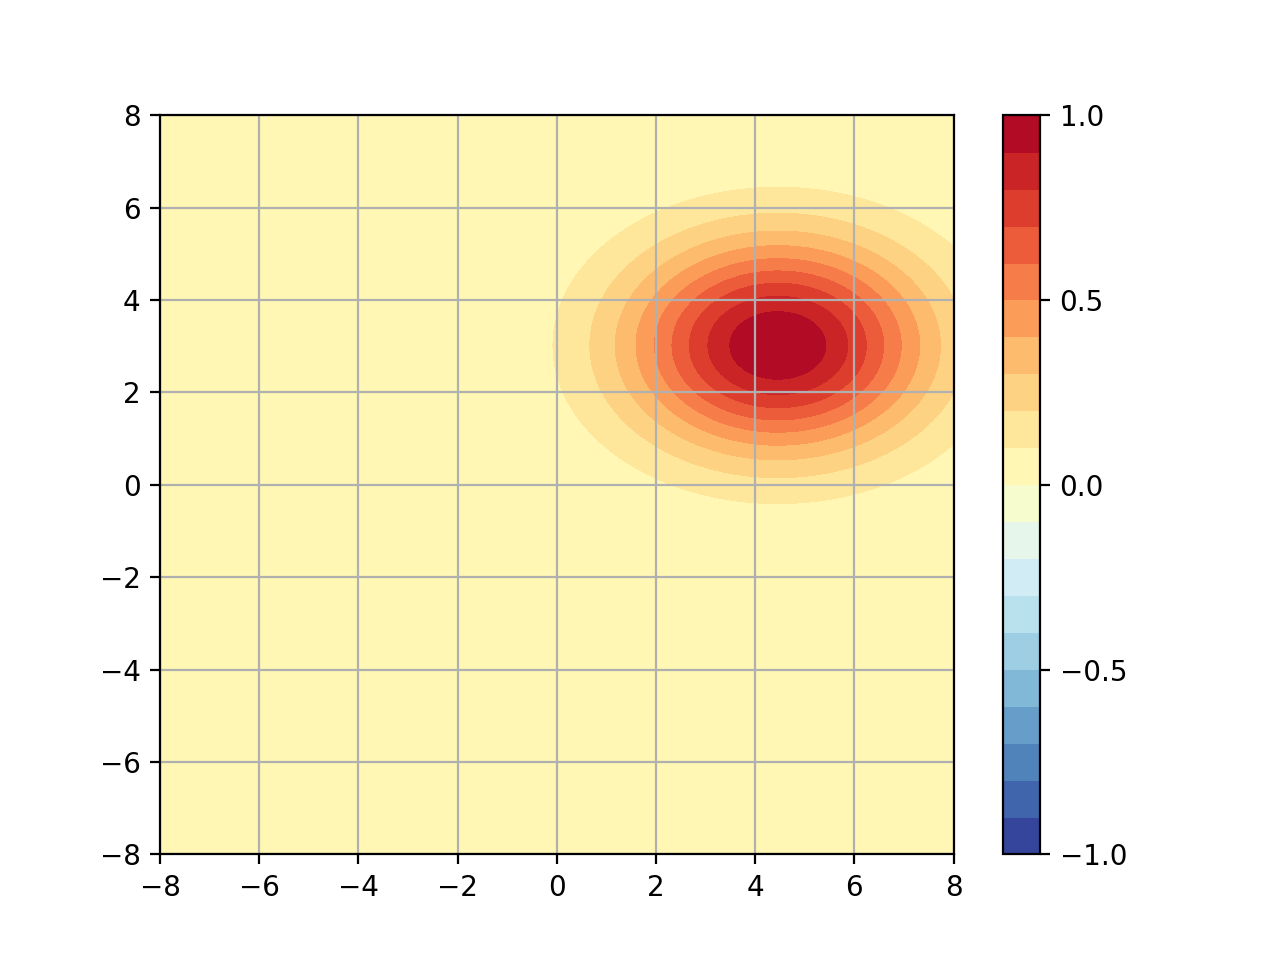

In [42]:
# plot the gaussian activity alone
r_activity_n = r_activity_full[:,2]
levels = np.arange(-1.0, 1.0+0.1, 0.1)
ticks = levels[::5]

plt.contourf(X1s, X2s, np.reshape(r_activity_n, np.shape(X1s) ), levels=levels, cmap=cm.RdYlBu_r)

plt.colorbar(ticks=ticks)

#reset axes
plt.axis([-8,8, -8, 8])
plt.grid(True)
plt.show()

In [43]:
### 1.5 full cov matrix

In [44]:
half_covar_matrix = 10.0*np.array([np.random.rand(input_dim,input_dim) for x in range(num_neurons)])
print("half covar", half_covar_matrix.shape)
print(half_covar_matrix)

covar_matrixes = np.matmul(half_covar_matrix,np.transpose(half_covar_matrix,axes=(0,2,1)))
print("full covar", covar_matrixes.shape)
print(covar_matrixes)
# make symmetric positive definite (old method)
# covar_matrixes = 0.5*(covar_matrixes+np.transpose(covar_matrixes,axes=(0,2,1)))
# covar_matrixes = covar_matrixes + 2.0*np.array([np.eye(input_dim) for _ in range(num_neurons)])
# covar_matrixes = 10.0*covar_matrixes
# covar_matrixes = 0.5*(covar_matrixes+covar_matrixes.T)+2.0*np.eye(input_dim)

# print(covar_matrixes.shape)
# print(covar_matrixes[0])

half covar (3, 2, 2)
[[[2.09257699 4.94820657]
  [6.55063791 2.23914407]]

 [[9.57561468 4.95239139]
  [7.93203623 9.34242376]]

 [[2.1463814  9.72897141]
  [8.66684719 7.02467531]]]
full covar (3, 2, 2)
[[[ 28.8636267   24.78746156]
  [ 24.78746156  47.92462315]]

 [[116.21857707 122.22146159]
  [122.22146159 150.19808047]]

 [[ 99.25983773  86.94522483]
  [ 86.94522483 124.46030338]]]


In [45]:
# inverse 
inv_covar_matrixes = np.linalg.inv(covar_matrixes)
print("inverse", inv_covar_matrixes.shape)
print(inv_covar_matrixes)

# check that prod is identity
for n in range(num_neurons):
    print("neuron", n)
    print(np.matmul(inv_covar_matrixes[n],covar_matrixes[n]))

inverse (3, 2, 2)
[[[ 0.06233204 -0.03223923]
  [-0.03223923  0.0375408 ]]

 [[ 0.05965635 -0.04854447]
  [-0.04854447  0.04616022]]

 [[ 0.02595931 -0.0181346 ]
  [-0.0181346   0.02070313]]]
neuron 0
[[ 1.00000000e+00 -1.10171016e-16]
 [-3.23335686e-17  1.00000000e+00]]
neuron 1
[[ 1.00000000e+00 -7.27356166e-17]
 [-1.82889901e-16  1.00000000e+00]]
neuron 2
[[1.00000000e+00 2.48383585e-16]
 [2.59429337e-16 1.00000000e+00]]


In [46]:
# use A=B*B' method to store covar matrix
# then inv(A) = inv(B')*inv(B) = inv(B)' * inv(B)
# inv_half1_covar_matrix = np.linalg.inv(np.transpose(half_covar_matrix,axes=(0,2,1)))
inv_half2_covar_matrix = np.linalg.inv(half_covar_matrix)
inv_half1_covar_matrix = np.transpose(inv_half2_covar_matrix,axes=(0,2,1))

# this is just matrix mul for each neuron
inv_covar_matrixes_2 = np.einsum('zij,zkj->zik', inv_half1_covar_matrix, inv_half1_covar_matrix)
print(inv_covar_matrixes_2.shape)
print(inv_covar_matrixes_2)

# check that prod is identity
for n in range(num_neurons):
    print("neuron", n)
    print(np.matmul(inv_covar_matrixes_2[n],covar_matrixes[n]))
    
# check that  inv_covar_matrixes_2 == invinv_covar_matrixes
print("comparison")
print(np.max(inv_covar_matrixes_2-inv_covar_matrixes))

(3, 2, 2)
[[[ 0.06233204 -0.03223923]
  [-0.03223923  0.0375408 ]]

 [[ 0.05965635 -0.04854447]
  [-0.04854447  0.04616022]]

 [[ 0.02595931 -0.0181346 ]
  [-0.0181346   0.02070313]]]
neuron 0
[[1.00000000e+00 1.37431841e-18]
 [2.86416949e-17 1.00000000e+00]]
neuron 1
[[1.00000000e+00 5.79387216e-16]
 [1.02606184e-15 1.00000000e+00]]
neuron 2
[[ 1.00000000e+00 -1.83424835e-16]
 [ 1.16991972e-16  1.00000000e+00]]
comparison
6.938893903907228e-17


In [47]:
# method 1: use inv_covar matrix
# seems like no speed up at all
ein_path_1 = np.einsum_path('...i,...ik,...k->...',
                          distances, inv_covar_matrixes,  distances,
                          optimize=True)
print("method 1")
for p in ein_path_1:
    print(p)

# method 2, use half_inv_covar ...ij,...jk->...ki
# potentially some speedup, but timeit doesn't show any
ein_path_2 = np.einsum_path('...i,...ij,...jk,...k->...',
                          distances, inv_half1_covar_matrix, inv_half2_covar_matrix,  distances,
                          optimize=True)
print()
print("method 2")
for p in ein_path_2:
    print(p)

method 1
['einsum_path', (0, 1), (0, 1)]
  Complete contraction:  xzi,zik,xzk->xz
         Naive scaling:  4
     Optimized scaling:  4
      Naive FLOP count:  9.332e+05
  Optimized FLOP count:  9.332e+05
   Theoretical speedup:  1.000
  Largest intermediate:  1.555e+05 elements
--------------------------------------------------------------------------
scaling                  current                                remaining
--------------------------------------------------------------------------
   4                zik,xzi->kzx                              xzk,kzx->xz
   3                 kzx,xzk->xz                                   xz->xz

method 2
['einsum_path', (1, 2), (0, 2), (0, 1)]
  Complete contraction:  xzi,zij,zjk,xzk->xz
         Naive scaling:  5
     Optimized scaling:  4
      Naive FLOP count:  2.488e+06
  Optimized FLOP count:  9.332e+05
   Theoretical speedup:  2.667
  Largest intermediate:  1.555e+05 elements
-----------------------------------------------------

In [48]:
### manual computation
# # for every input in batch
# ded = np.zeros(a*b).reshape(a,b)
# for ai in range(a):
#     # for every neuron
#     for bi in range(b):
# #         de =   np.matmul(distances[ai,bi,:], inv_covar_matrixes[bi,:,:])
# #         ded[ai,bi] = np.matmul(de, np.transpose(distances[ai,bi,:]))
#         ded[ai,bi] = np.einsum('i,ik,k->', distances[ai,bi,:], inv_covar_matrixes[bi,:,:],  distances[ai,bi,:])

### this is black magic
print(distances.shape)
print(inv_covar_matrixes.shape)
# method 1
ded1 = np.einsum('xzi,zik,xzk->xz', distances, inv_covar_matrixes,  distances, optimize=ein_path_1[0])

# method 2
ded2 = np.einsum('xzi,zij,zkj,xzk->xz',
                distances, inv_half1_covar_matrix, inv_half1_covar_matrix,  distances,
                optimize=ein_path_2[0])


# check that they are the same
print("ded1", ded1.shape)
print("ded2", ded2.shape)

print(np.max(np.abs(ded1-ded2)))

# print(torch.matmul(de[0], d.transpose(0,1)))
r_activity_full1 = np.exp(-ded1)
r_activity_full2 = np.exp(-ded2)

print("full", r_activity_full2.shape)
# print(r_activity_full2)

(25921, 3, 2)
(3, 2, 2)
ded1 (25921, 3)
ded2 (25921, 3)
3.197442310920451e-14
full (25921, 3)


In [49]:
%%timeit 
np.einsum('xzi,zij,zjk,xzk->xz',
                distances, inv_half1_covar_matrix, inv_half2_covar_matrix,  distances,
                optimize=ein_path_2[0])

10 loops, best of 3: 28.3 ms per loop


In [50]:
%%timeit 
np.einsum('xzi,zij,zjk,xzk->xz',
                distances, inv_half2_covar_matrix, inv_half1_covar_matrix,  distances)

10 loops, best of 3: 26.5 ms per loop


In [51]:
# computation of trace of inverse
# method 1
path1 =  np.einsum_path('...ii->...', inv_covar_matrixes, optimize=True)
for p in path1:
    print(p)
inv_trace1 = np.einsum('zii->', inv_covar_matrixes, optimize=path1[0])
print(inv_trace1.shape)
print(inv_trace1)

# method 2
print()
path2 =  np.einsum_path('...ik,...ik->...', inv_half1_covar_matrix, inv_half1_covar_matrix, optimize=True)
for p in path2:
    print(p)
inv_trace2 = np.einsum('zik,zik->', inv_half1_covar_matrix, inv_half1_covar_matrix, optimize=path2[0])
print(inv_trace2.shape)
print(inv_trace2)

# check
print(np.sum(np.diag(inv_covar_matrixes[2])))

['einsum_path', (0,)]
  Complete contraction:  zii->z
         Naive scaling:  2
     Optimized scaling:  2
      Naive FLOP count:  6.000e+00
  Optimized FLOP count:  1.300e+01
   Theoretical speedup:  0.462
  Largest intermediate:  3.000e+00 elements
--------------------------------------------------------------------------
scaling                  current                                remaining
--------------------------------------------------------------------------
   2                      zii->z                                     z->z
()
0.2523518495539886

['einsum_path', (0, 1)]
  Complete contraction:  zik,zik->z
         Naive scaling:  3
     Optimized scaling:  3
      Naive FLOP count:  2.400e+01
  Optimized FLOP count:  2.500e+01
   Theoretical speedup:  0.960
  Largest intermediate:  3.000e+00 elements
--------------------------------------------------------------------------
scaling                  current                                remaining
------------------

In [52]:
%%timeit 
np.einsum('zii->z', np.matmul(inv_half1_covar_matrix,np.transpose(inv_half1_covar_matrix,(0,2,1)) ) )

The slowest run took 19.99 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 8.55 µs per loop


In [53]:
%%timeit
np.einsum('zik,zik->z', inv_half1_covar_matrix, inv_half1_covar_matrix)

The slowest run took 6.31 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.87 µs per loop


In [54]:
# computation of trace
cov_trace = np.einsum('zii->z', covar_matrixes, optimize=['einsum_path', (0,)])
print(cov_trace)
# check
print(np.sum(np.diag(covar_matrixes[2])))

[ 76.78824986 266.41665754 223.72014111]
223.72014110971074


<IPython.core.display.Javascript object>


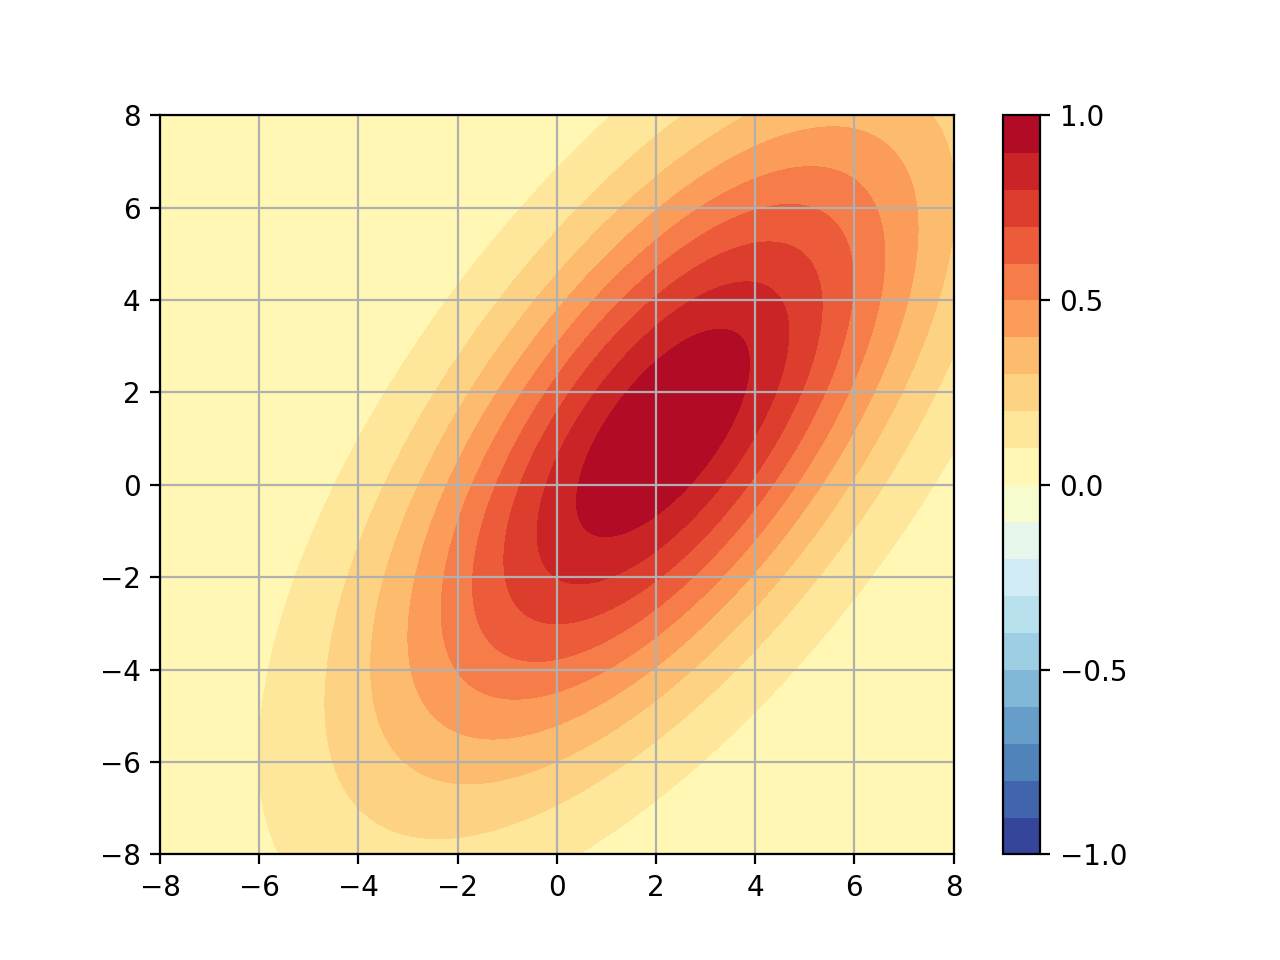

In [55]:
# plot the gaussian activity alone
r_activity_n = r_activity_full1[:,0]
levels = np.arange(-1.0, 1.0+0.1, 0.1)
ticks = levels[::5]

plt.contourf(X1s, X2s, np.reshape(r_activity_n, np.shape(X1s) ), levels=levels, cmap=cm.RdYlBu_r)

plt.colorbar(ticks=ticks)

#reset axes
plt.axis([-8,8, -8, 8])
plt.grid(True)
plt.show()

In [56]:
### Extra 2

In [57]:
# # Useful: Test any Gaussian activity
# # combining circular gaussian with normal neuron
# # neuron parameters (weights, bias)
# W = [1,1]
# # b = 0 # bias defined by by the center of radial function

# # radial parameters
# center = [0, 0] # controls the center of gaussian (<=> bias of neuron)
# sig = 10 # controls the size of the gaussian
# b = -np.matmul(W,center)
# print(b)
# # new zero line
# zero_line = -(W[0]*X1+b)/W[1]

# # heatmap neuronal activity
# n_activity = np.sum(W*inputs_heatmap, axis=1)+b
# print(n_activity.shape)

# # heatmap radial activity 

# r_activity = np.exp((-1.0/sig**2) *  np.sum(np.square(inputs_heatmap-center), axis=1))
# print(r_activity.shape)

# # overall heatmap activity
# activity = n_activity*r_activity

# # TEST: activity of tanh(lin)*gaussian

# activity = np.tanh(n_activity)*r_activity

# # plot the zero line
# plt.plot(X1,zero_line, color='black')
# # plot the heatmap 
# levels = np.arange(-1,1.1, 0.1)
# # extend level to be inclusive on last level
# levels[-1]*=1.001
# ticks = levels[::5]


# plt.contourf(X1s, X2s, np.reshape(activity, np.shape(X1s) ), levels=levels, cmap=cm.RdYlBu_r)

# plt.colorbar(ticks=ticks)
# #reset axes
# plt.axis([-8,8, -8, 8])
# plt.grid(True)
# plt.show()